In [1]:
!pip install monotonic-binning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import seaborn as sns
from monotonic_binning.monotonic_woe_binning import Binning

### READING DATA

In [2]:
df=pd.read_csv("E:\\PBS\T2\\AIF\\application_train.csv")

In [3]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [30]:
df_1=df[df['TARGET']==1]
df_0=df[df['TARGET']==0]

In [7]:
df_cat_features = df.select_dtypes(include='object')

In [8]:
df_cat_features.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [29]:
df_1.CODE_GENDER.mode()

0    F
Name: CODE_GENDER, dtype: object

In [31]:
for i in df.columns:

    df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
    df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
df_final=pd.concat([df_1,df_0])

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\310515976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [32]:
df_final.to_csv("mode_imputed_df.csv")  

In [24]:
missing=check_missing_data(df_final)
missing

,Total,Percent
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
NAME_INCOME_TYPE,0,0.000000
NAME_TYPE_SUITE,0,0.000000
AMT_CREDIT,0,0.000000
FONDKAPREMONT_MODE,0,0.000000


In [25]:
for i in df_cat_features.columns:
    print(missing.loc[i])

Total      0.0
Percent    0.0
Name: NAME_CONTRACT_TYPE, dtype: float64
Total      0.0
Percent    0.0
Name: CODE_GENDER, dtype: float64
Total      0.0
Percent    0.0
Name: FLAG_OWN_CAR, dtype: float64
Total      0.0
Percent    0.0
Name: FLAG_OWN_REALTY, dtype: float64
Total      0.0
Percent    0.0
Name: NAME_TYPE_SUITE, dtype: float64
Total      0.0
Percent    0.0
Name: NAME_INCOME_TYPE, dtype: float64
Total      0.0
Percent    0.0
Name: NAME_EDUCATION_TYPE, dtype: float64
Total      0.0
Percent    0.0
Name: NAME_FAMILY_STATUS, dtype: float64
Total      0.0
Percent    0.0
Name: NAME_HOUSING_TYPE, dtype: float64
Total      0.0
Percent    0.0
Name: OCCUPATION_TYPE, dtype: float64
Total      0.0
Percent    0.0
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64
Total      0.0
Percent    0.0
Name: ORGANIZATION_TYPE, dtype: float64
Total      0.0
Percent    0.0
Name: FONDKAPREMONT_MODE, dtype: float64
Total      0.0
Percent    0.0
Name: HOUSETYPE_MODE, dtype: float64
Total      0.0
Percent    0

In [6]:
df_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [ ]:

df.columns.dtype=='object'

In [6]:
column=['LANDAREA_AVG',
 'LANDAREA_MODE',
 'LANDAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_MEDI',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',]

<AxesSubplot:xlabel='LANDAREA_AVG', ylabel='Density'>

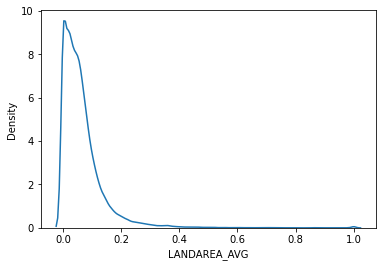

In [25]:
sns.kdeplot(df.LANDAREA_AVG)

<AxesSubplot:xlabel='LANDAREA_AVG', ylabel='Density'>

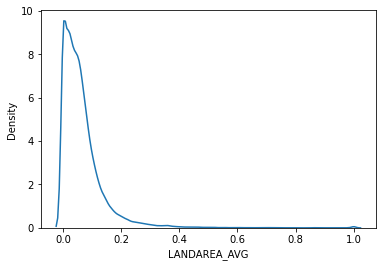

In [26]:
#for i in range(len(column)):
col=column[0]
mean=df[col].mean()
for i in range(len(df)):
    if df[col].iloc[i]==np.NaN:
        df[col].iloc[i]=mean
sns.kdeplot(df[col])

<AxesSubplot:xlabel='LANDAREA_MODE', ylabel='Density'>

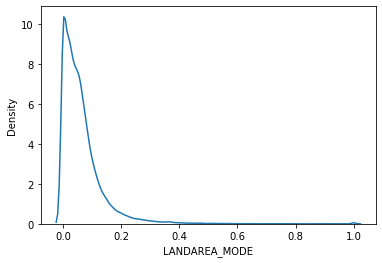

In [27]:
sns.kdeplot(df.LANDAREA_MODE)

<AxesSubplot:xlabel='LANDAREA_MODE', ylabel='Density'>

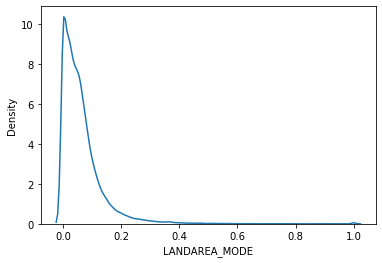

In [28]:
col=column[1]
mean=df[col].mean()
for i in range(len(df)):
    if df[col].iloc[i]==np.NaN:
        df[col].iloc[i]=mean
sns.kdeplot(df[col])

<AxesSubplot:xlabel='LANDAREA_MEDI', ylabel='Density'>

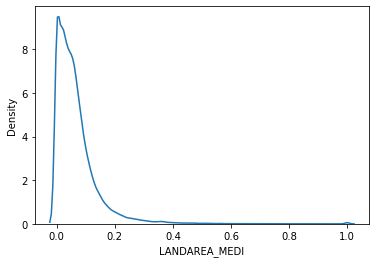

In [29]:
sns.kdeplot(df.LANDAREA_MEDI)

<AxesSubplot:xlabel='LANDAREA_MEDI', ylabel='Density'>

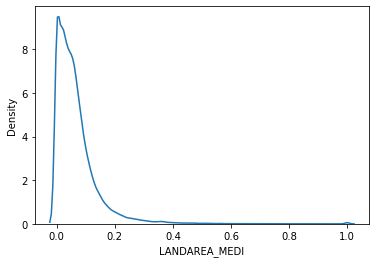

In [30]:
col=column[2]
mean=df[col].mean()
for i in range(len(df)):
    if df[col].iloc[i]==np.NaN:
        df[col].iloc[i]=mean
sns.kdeplot(df[col])

<AxesSubplot:xlabel='BASEMENTAREA_AVG', ylabel='Density'>

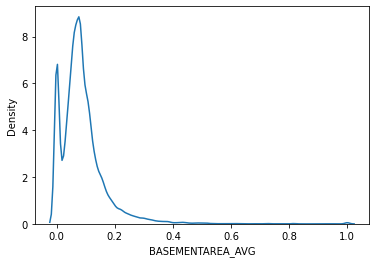

In [31]:
sns.kdeplot(df.BASEMENTAREA_AVG)

<AxesSubplot:xlabel='BASEMENTAREA_AVG', ylabel='Density'>

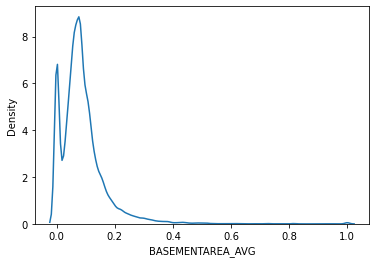

In [32]:
col=column[3]
mean=df[col].mean()
for i in range(len(df)):
    if df[col].iloc[i]==np.NaN:
        df[col].iloc[i]=mean
sns.kdeplot(df[col])

<AxesSubplot:xlabel='BASEMENTAREA_MODE', ylabel='Density'>

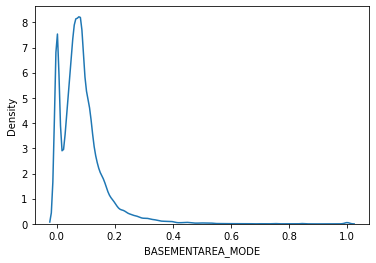

In [34]:
col=column[4]
mean=df[col].mean()
for i in range(len(df)):
    if df[col].iloc[i]==np.NaN:
        df[col].iloc[i]=mean
sns.kdeplot(df[col])

<AxesSubplot:xlabel='BASEMENTAREA_MEDI', ylabel='Density'>

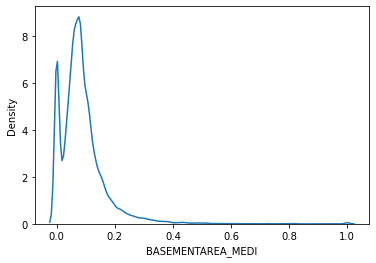

In [33]:
col=column[5]
mean=df[col].mean()
for i in range(len(df)):
    if df[col].iloc[i]==np.NaN:
        df[col].iloc[i]=mean
sns.kdeplot(df[col])

<AxesSubplot:xlabel='EXT_SOURCE_1', ylabel='Density'>

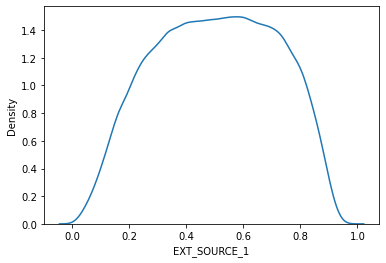

In [35]:
col=column[6]
mean=df[col].mean()
for i in range(len(df)):
    if df[col].iloc[i]==np.NaN:
        df[col].iloc[i]=mean
sns.kdeplot(df[col])

<AxesSubplot:xlabel='NONLIVINGAREA_AVG', ylabel='Density'>

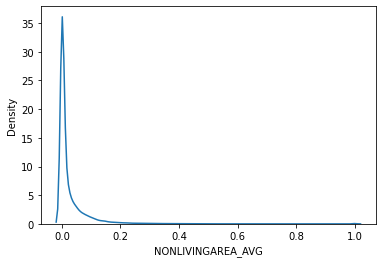

In [36]:
col=column[7]
mean=df[col].mean()
for i in range(len(df)):
    if df[col].iloc[i]==np.NaN:
        df[col].iloc[i]=mean
sns.kdeplot(df[col])

<AxesSubplot:xlabel='NONLIVINGAREA_MEDI', ylabel='Density'>

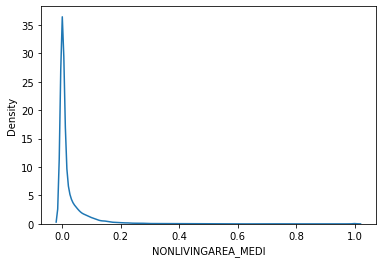

In [37]:
col=column[8]
mean=df[col].mean()
for i in range(len(df)):
    if df[col].iloc[i]==np.NaN:
        df[col].iloc[i]=mean
sns.kdeplot(df[col])

<AxesSubplot:xlabel='NONLIVINGAREA_MODE', ylabel='Density'>

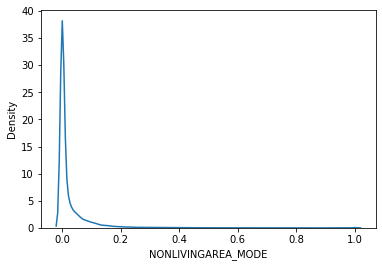

In [38]:
col=column[9]
mean=df[col].mean()
for i in range(len(df)):
    if df[col].iloc[i]==np.NaN:
        df[col].iloc[i]=mean
sns.kdeplot(df[col])

In [39]:
col=column[10]
mean=df[col].mean()
for i in range(len(df)):
    if df[col].iloc[i]==np.NaN:
        df[col].iloc[i]=mean
sns.kdeplot(df[col])

IndexError: list index out of range

### NUMERICAL COLUMNS

In [26]:
df_nm_features = df.select_dtypes(exclude='object')

In [27]:
df_nm_features

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
len(df_nm_features.columns)

106

### UNIVARIATE ANALYSIS

In [15]:
def graph_v3(df,columns=None): #func takes two args one is filename and next is columns whose graphs to be plotted
    df = pd.read_csv(df)
    if columns==None:     #if default i.e none is given then all the columns or complete dataset is taken
        df=df.iloc[:]
    else:
        df=df[columns]     #otherwise the specified columns are dealt with
    
    df_nm_features = df.select_dtypes(exclude='object')
    df_ct_features = df.select_dtypes(include='object')
    
    for i in df_nm_features:
        if len(df_nm_features[i].unique())>=5:
            plt.figure(figsize=(11,11))
            plt.subplot(2,1,1)
            sns.boxplot(x=df_nm_features[i],color='blue')
            plt.xlabel(i,fontsize=11)
            plt.title('Boxplot of attribute '+i,fontsize=11)
            plt.subplot(2,1,2)
            plt.hist(df_nm_features[i],                              
                     color="blue",
                     edgecolor="black")
            plt.tight_layout(pad=8)
            plt.xlabel(i)
            plt.ylabel('Frequency ')
            plt.title('Histogram of attribute '+i,fontsize=11)
            plt.savefig('v3'+i+'.png')
            
        else:
            df_nm_features[i].value_counts().plot(kind='bar',figsize=(5,5),color="blue",fontsize=11)
            plt.xlabel(i)
            plt.title('Bar graph of attribute  '+i,fontsize=11)
            plt.savefig('v3'+i+'.png')
            
            

        
    for l in df_ct_features:
        df_ct_features[l].value_counts().plot(kind='bar',figsize=(5,5),color="blue",fontsize=11)
        plt.xlabel(l)
        plt.title('Bar graph of attribute  '+l,fontsize=11)
        plt.savefig('v3'+l+'.png')
       

In [16]:
#graph_v3("E:\\PBS\T2\\AIF\\application_train.csv")

In [9]:
def check_missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/len(df)) *100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [8]:
# profile=ProfileReport(df)
# profile

In [37]:
missing=check_missing_data(df)
missing

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [23]:
len(missing[missing.Percent==0])

55

In [38]:
for i in missing.index:
    if missing.Percent[i]>60:
        print(i)
        df=df.drop([i],axis=1)

COMMONAREA_MEDI
COMMONAREA_AVG
COMMONAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAPARTMENTS_AVG
NONLIVINGAPARTMENTS_MEDI
FONDKAPREMONT_MODE
LIVINGAPARTMENTS_MODE
LIVINGAPARTMENTS_AVG
LIVINGAPARTMENTS_MEDI
FLOORSMIN_AVG
FLOORSMIN_MODE
FLOORSMIN_MEDI
YEARS_BUILD_MEDI
YEARS_BUILD_MODE
YEARS_BUILD_AVG
OWN_CAR_AGE


In [40]:
missing=check_missing_data(df)
missing

,Total,Percent
LANDAREA_AVG,182590,59.376738
LANDAREA_MODE,182590,59.376738
LANDAREA_MEDI,182590,59.376738
BASEMENTAREA_AVG,179943,58.515956
BASEMENTAREA_MODE,179943,58.515956
...,...,...
REGION_POPULATION_RELATIVE,0,0.000000
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000


In [41]:
missing_zero=[]
for i in missing.index:
    if missing.Percent[i]==0:
        missing_zero.append(i)
len(missing_zero)       

55

In [13]:
missing.Percent["ORGANIZATION_TYPE"]

0.0

In [14]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
col=[]
for i in df.columns:
    col.append(i)
len(col)

105

In [42]:
non_zer_df=df[missing_zero]

In [43]:
non_zer_df

,FLAG_DOCUMENT_10,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,ORGANIZATION_TYPE,...,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,SK_ID_CURR
0,0,1,0,0,0,0,0,0,0,Business Entity Type 3,...,1,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,100002
1,0,1,0,0,0,0,0,0,0,School,...,1,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,100003
2,0,0,0,0,0,0,0,0,0,Government,...,1,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,100004
3,0,1,0,0,0,0,0,0,0,Business Entity Type 3,...,1,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,100006
4,0,0,0,0,0,0,1,0,0,Religion,...,1,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,100007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,Services,...,1,-1982,-8456.0,-236,-9327,0.032561,With parents,Separated,Secondary / secondary special,456251
307507,0,1,0,0,0,0,0,0,0,XNA,...,1,-4090,-4388.0,365243,-20775,0.025164,House / apartment,Widow,Secondary / secondary special,456252
307508,0,1,0,0,0,0,0,0,0,School,...,1,-5150,-6737.0,-7921,-14966,0.005002,House / apartment,Separated,Higher education,456253
307509,0,1,0,0,0,0,0,0,0,Business Entity Type 1,...,1,-931,-2562.0,-4786,-11961,0.005313,House / apartment,Married,Secondary / secondary special,456254


In [43]:
len(missing_non_zero)

50

In [18]:
missing_non_zero=[]
for i in missing.index:
    if missing.Percent[i]!=0:
        missing_non_zero.append(i)
len(missing_non_zero)       

['LANDAREA_AVG',
 'LANDAREA_MODE',
 'LANDAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_MEDI',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'NAME_TYPE_SUITE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 

In [30]:
df.iloc[0,:]

SK_ID_CURR                        100002
TARGET                                 1
NAME_CONTRACT_TYPE            Cash loans
CODE_GENDER                            M
FLAG_OWN_CAR                           N
                                 ...    
AMT_REQ_CREDIT_BUREAU_DAY            0.0
AMT_REQ_CREDIT_BUREAU_WEEK           0.0
AMT_REQ_CREDIT_BUREAU_MON            0.0
AMT_REQ_CREDIT_BUREAU_QRT            0.0
AMT_REQ_CREDIT_BUREAU_YEAR           1.0
Name: 0, Length: 105, dtype: object

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
non_zer_df.dtypes

FLAG_DOCUMENT_10                 int64
FLAG_DOCUMENT_3                  int64
FLAG_DOCUMENT_4                  int64
FLAG_DOCUMENT_5                  int64
FLAG_DOCUMENT_6                  int64
FLAG_DOCUMENT_7                  int64
FLAG_DOCUMENT_8                  int64
FLAG_DOCUMENT_9                  int64
FLAG_DOCUMENT_2                  int64
ORGANIZATION_TYPE               object
FLAG_DOCUMENT_12                 int64
FLAG_DOCUMENT_13                 int64
FLAG_DOCUMENT_14                 int64
FLAG_DOCUMENT_15                 int64
FLAG_DOCUMENT_16                 int64
FLAG_DOCUMENT_17                 int64
FLAG_DOCUMENT_18                 int64
FLAG_DOCUMENT_19                 int64
FLAG_DOCUMENT_20                 int64
FLAG_DOCUMENT_21                 int64
CNT_CHILDREN                     int64
FLAG_OWN_REALTY                 object
FLAG_OWN_CAR                    object
CODE_GENDER                     object
NAME_CONTRACT_TYPE              object
FLAG_DOCUMENT_11         

In [21]:
non_zer_df_nm=non_zer_df.select_dtypes(exclude='object')
non_zer_df_cat=non_zer_df.select_dtypes(include='object')

In [22]:
non_zer_df_nm

,FLAG_DOCUMENT_10,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FLAG_DOCUMENT_12,...,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
0,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,-2120,-3648.0,-637,-9461,0.018801,100002
1,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,-291,-1186.0,-1188,-16765,0.003541,100003
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,-2531,-4260.0,-225,-19046,0.010032,100004
3,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,-2437,-9833.0,-3039,-19005,0.008019,100006
4,0,0,0,0,0,0,1,0,0,0,...,1,0,1,1,-3458,-4311.0,-3038,-19932,0.028663,100007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,0,...,1,0,1,1,-1982,-8456.0,-236,-9327,0.032561,456251
307507,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,-4090,-4388.0,365243,-20775,0.025164,456252
307508,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,-5150,-6737.0,-7921,-14966,0.005002,456253
307509,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,-931,-2562.0,-4786,-11961,0.005313,456254


In [23]:
scaler = MinMaxScaler()
scaler.fit(non_zer_df_nm)
scaled_nm=pd.DataFrame(scaler.transform(non_zer_df_nm))

In [24]:
scaled_nm.columns=non_zer_df_nm.columns

In [31]:
non_zer_df.iloc[i,:]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [25]:
non_zer_df.describe()

,FLAG_DOCUMENT_10,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FLAG_DOCUMENT_12,...,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.000023,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000042,0.000007,...,0.998133,0.199368,0.819889,0.999997,-2994.202373,-4986.120328,63815.045904,-16036.995067,0.020868,278180.518577
std,0.004771,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.006502,0.002550,...,0.043164,0.399526,0.384280,0.001803,1509.450419,3522.886321,141275.766519,4363.988632,0.013831,102790.175348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-7197.000000,-24672.000000,-17912.000000,-25229.000000,0.000290,100002.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,-4299.000000,-7479.500000,-2760.000000,-19682.000000,0.010006,189145.500000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,-3254.000000,-4504.000000,-1213.000000,-15750.000000,0.018850,278202.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,-1720.000000,-2010.000000,-289.000000,-12413.000000,0.028663,367142.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,365243.000000,-7489.000000,0.072508,456255.000000


In [28]:
scaled_nm.describe()

,FLAG_DOCUMENT_10,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FLAG_DOCUMENT_12,...,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.000023,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000042,0.000007,...,0.998133,0.199368,0.819889,0.999997,0.583965,0.797904,0.213300,0.518151,0.284944,0.500146
std,0.004771,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.006502,0.002550,...,0.043164,0.399526,0.384280,0.001803,0.209733,0.142789,0.368717,0.245997,0.191521,0.288531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.402668,0.696843,0.039545,0.312683,0.134537,0.250225
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.547867,0.817445,0.043583,0.534329,0.257000,0.500206
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.761012,0.918531,0.045994,0.722435,0.392880,0.749862
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
scaled_nm=scaled_nm.drop(['SK_ID_CURR'],axis=1)

In [30]:
scaled_nm['LANDAREA_AVG']=df['LANDAREA_AVG']

In [31]:
train=scaled_nm.dropna()

In [32]:
train.describe()

,FLAG_DOCUMENT_10,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FLAG_DOCUMENT_12,...,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,LANDAREA_AVG
count,124921.000000,124921.000000,124921.000000,124921.000000,124921.000000,124921.000000,124921.000000,124921.000000,124921.000000,124921.000000,...,124921.000000,124921.000000,124921.000000,124921.000000,124921.000000,124921.000000,124921.000000,124921.000000,124921.000000,124921.000000
mean,0.000040,0.692286,0.000072,0.015274,0.087415,0.000208,0.088208,0.005019,0.000056,0.000016,...,0.997727,0.175383,0.824433,0.999992,0.580379,0.787712,0.208781,0.512936,0.306737,0.066333
std,0.006326,0.461550,0.008488,0.122640,0.282444,0.014425,0.283598,0.070668,0.007486,0.004001,...,0.047627,0.380296,0.380453,0.002829,0.210533,0.147172,0.365110,0.246364,0.217744,0.081184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.089760,0.070687,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.401000,0.677732,0.039256,0.308174,0.136490,0.018700
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.537724,0.802286,0.043489,0.530158,0.268617,0.048100
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.758510,0.916950,0.045968,0.716347,0.392880,0.085600
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.989346,1.000000,1.000000


In [33]:
train1=train.sample(60000)

In [34]:
x_train=train1.drop(['LANDAREA_AVG'],axis=1)

In [35]:
y_train=train1['LANDAREA_AVG']

In [36]:
test=scaled_nm[scaled_nm.LANDAREA_AVG.isna()]

In [37]:
test

,FLAG_DOCUMENT_10,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FLAG_DOCUMENT_12,...,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,LANDAREA_AVG
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.648326,0.827335,0.046161,0.348534,0.134897,NaN
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.661387,0.601451,0.038817,0.350846,0.107023,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.519522,0.825268,0.038820,0.298591,0.392880,NaN
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.933722,0.798557,0.042604,0.467193,0.491595,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.913992,0.950835,0.038580,0.645490,0.491595,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.453105,0.972641,0.045707,0.753044,0.311695,NaN
307504,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.964013,0.602870,0.027806,0.480496,0.309272,NaN
307508,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.284424,0.726937,0.026076,0.578523,0.065247,NaN
307509,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.870641,0.896158,0.034258,0.747914,0.069553,NaN


In [38]:
x_test=test.drop(['LANDAREA_AVG'],axis=1)

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [40]:
model=KNeighborsRegressor(n_neighbors=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#r2_score(y_train,y_pred)
y_pred

array([0.0515 , 0.0278 , 0.0791 , ..., 0.00765, 0.     , 0.0745 ])

(array([4.8297e+04, 8.9430e+03, 1.6580e+03, 5.8200e+02, 2.2100e+02,
        9.3000e+01, 5.6000e+01, 4.1000e+01, 2.9000e+01, 8.0000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

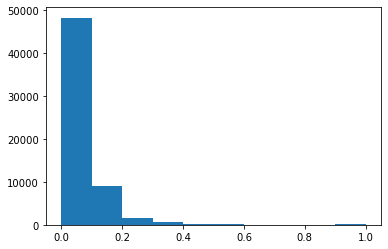

In [41]:
plt.hist(y_train)

(array([1.39372e+05, 3.49250e+04, 5.62800e+03, 1.37300e+03, 5.74000e+02,
        2.10000e+02, 4.46000e+02, 4.70000e+01, 7.00000e+00, 8.00000e+00]),
 array([0.      , 0.081385, 0.16277 , 0.244155, 0.32554 , 0.406925,
        0.48831 , 0.569695, 0.65108 , 0.732465, 0.81385 ]),
 <BarContainer object of 10 artists>)

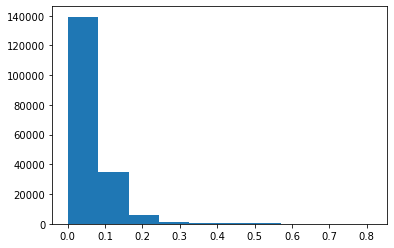

In [42]:
plt.hist(y_pred)

In [33]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
### KNN 

In [44]:
non_zer_df_nm=non_zer_df.select_dtypes(exclude='object')
non_zer_df_cat=non_zer_df.select_dtypes(include='object')

In [48]:
scaler = MinMaxScaler()
scaler.fit(non_zer_df_nm)
scaled_nm=pd.DataFrame(scaler.transform(non_zer_df_nm))
scaled_nm.columns=non_zer_df_nm.columns

In [49]:
non_zer_df.describe()



scaled_nm.describe()

#scaled_nm=scaled_nm.drop(['SK_ID_CURR'],axis=1)

scaled_nm['LANDAREA_AVG']=df['LANDAREA_AVG']

train=scaled_nm.dropna()

train.describe()

train1=train.sample(60000)

x_train=train1.drop(['LANDAREA_AVG'],axis=1)

y_train=train1['LANDAREA_AVG']

test=scaled_nm[scaled_nm.LANDAREA_AVG.isna()]

test

x_test=test.drop(['LANDAREA_AVG'],axis=1)

In [52]:
len(train)

124921

In [50]:
train1

,FLAG_DOCUMENT_10,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FLAG_DOCUMENT_12,...,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR,LANDAREA_AVG
167728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.894539,0.774441,0.045295,0.966122,0.392880,0.545758,0.0208
32885,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.398499,0.748176,0.043831,0.498083,0.147830,0.106977,0.1688
282601,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.580659,0.809460,0.041618,0.323788,0.392880,0.918827,0.0433
272071,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.441156,0.836981,0.034119,0.519166,0.392880,0.885337,0.0356
77419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.871891,0.970574,0.044682,0.867644,0.107023,0.251956,0.0834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.482701,0.425746,0.037810,0.285175,1.000000,0.854862,0.0000
33567,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.391691,0.965021,0.031355,0.207272,0.206749,0.109142,0.0141
278218,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.359038,0.438392,1.000000,0.137542,0.429796,0.904829,0.0694
114396,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.443796,0.988367,1.000000,0.067475,0.635991,0.372370,0.0000


In [51]:
test

,FLAG_DOCUMENT_10,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FLAG_DOCUMENT_12,...,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR,LANDAREA_AVG
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.648326,0.827335,0.046161,0.348534,0.134897,0.000006,NaN
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.661387,0.601451,0.038817,0.350846,0.107023,0.000011,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.519522,0.825268,0.038820,0.298591,0.392880,0.000014,NaN
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.933722,0.798557,0.042604,0.467193,0.491595,0.000017,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.913992,0.950835,0.038580,0.645490,0.491595,0.000020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.453105,0.972641,0.045707,0.753044,0.311695,0.999978,NaN
307504,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.964013,0.602870,0.027806,0.480496,0.309272,0.999980,NaN
307508,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.284424,0.726937,0.026076,0.578523,0.065247,0.999994,NaN
307509,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.870641,0.896158,0.034258,0.747914,0.069553,0.999997,NaN


In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

model=KNeighborsRegressor(n_neighbors=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#r2_score(y_train,y_pred)
y_pred

array([0.0352 , 0.041  , 0.0901 , ..., 0.10335, 0.06615, 0.0445 ])

In [55]:
test['LANDAREA_AVG']=y_pred

C:\Users\Andrew\AppData\Local\Temp\ipykernel_7820\4125171481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LANDAREA_AVG']=y_pred


In [56]:
test

,FLAG_DOCUMENT_10,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FLAG_DOCUMENT_12,...,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR,LANDAREA_AVG
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.648326,0.827335,0.046161,0.348534,0.134897,0.000006,0.03520
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.661387,0.601451,0.038817,0.350846,0.107023,0.000011,0.04100
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.519522,0.825268,0.038820,0.298591,0.392880,0.000014,0.09010
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.933722,0.798557,0.042604,0.467193,0.491595,0.000017,0.10580
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.913992,0.950835,0.038580,0.645490,0.491595,0.000020,0.06595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.453105,0.972641,0.045707,0.753044,0.311695,0.999978,0.08615
307504,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.964013,0.602870,0.027806,0.480496,0.309272,0.999980,0.03935
307508,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.284424,0.726937,0.026076,0.578523,0.065247,0.999994,0.10335
307509,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.870641,0.896158,0.034258,0.747914,0.069553,0.999997,0.06615


In [57]:
combined=pd.concat([train,test])
combined.sort_index(axis = 0)

,FLAG_DOCUMENT_10,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FLAG_DOCUMENT_12,...,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR,LANDAREA_AVG
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.705433,0.852140,0.045086,0.888839,0.256321,0.000000,0.03690
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.959566,0.951929,0.043648,0.477114,0.045016,0.000003,0.01300
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.648326,0.827335,0.046161,0.348534,0.134897,0.000006,0.03520
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.661387,0.601451,0.038817,0.350846,0.107023,0.000011,0.04100
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.519522,0.825268,0.038820,0.298591,0.392880,0.000014,0.09010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.724607,0.657263,0.046133,0.896392,0.446855,0.999989,0.05940
307507,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.431708,0.822147,1.000000,0.251071,0.344429,0.999992,0.05790
307508,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.284424,0.726937,0.026076,0.578523,0.065247,0.999994,0.10335
307509,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.870641,0.896158,0.034258,0.747914,0.069553,0.999997,0.06615


In [58]:
df['LANDAREA_AVG']=combined["LANDAREA_AVG"]

In [59]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Numerical KNN Imputation by sampling

In [ ]:
non_zer_df_nm=non_zer_df.select_dtypes(exclude='object')
non_zer_df_cat=non_zer_df.select_dtypes(include='object')

scaler = MinMaxScaler()
scaler.fit(non_zer_df_nm)
scaled_nm=pd.DataFrame(scaler.transform(non_zer_df_nm))
scaled_nm.columns=non_zer_df_nm.columns

non_zer_df.describe()



scaled_nm.describe()

#scaled_nm=scaled_nm.drop(['SK_ID_CURR'],axis=1)

scaled_nm['LANDAREA_AVG']=df['LANDAREA_AVG']

train=scaled_nm.dropna()

train.describe()

train1=train.sample(60000)

x_train=train1.drop(['LANDAREA_AVG'],axis=1)

y_train=train1['LANDAREA_AVG']

test=scaled_nm[scaled_nm.LANDAREA_AVG.isna()]

test

x_test=test.drop(['LANDAREA_AVG'],axis=1)

### Categorical Imputation

In [ ]:
df

df_1=df[df['TARGET']==1]
df_0=df[df['TARGET']==0]

df_cat_features = df.select_dtypes(include='object')

df_cat_features.columns

df_1.CODE_GENDER.mode()

for i in df.columns:

    df_1[i]= df_1[i].fillna(df_1[i].mode()[0])
    df_0[i]= df_0[i].fillna(df_0[i].mode()[0])
df_final=pd.concat([df_1,df_0])

df_final.to_csv("mode_imputed_df.csv")  

### Previous application data

In [74]:
prev_app=pd.read_csv("E:\\PBS\T2\\AIF\\previous_application.csv")

In [61]:
prev_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [75]:
missing=check_missing_data(prev_app)
missing

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


In [76]:
for i in missing.index:
    if missing.Percent[i]>60:
        print(i)
        prev_app=prev_app.drop([i],axis=1)

RATE_INTEREST_PRIVILEGED
RATE_INTEREST_PRIMARY


In [77]:
prev_app_mean=prev_app.groupby('SK_ID_CURR').mean()

In [128]:
prev_app_mean.dropna(inplace=True)

In [129]:
prev_app_mean.to_csv("C:\\Users\\Andrew\\aif_files\\previous_application_mean.csv")

In [141]:
prev_app_mean

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,,,,,,,,,,,,,,,,,,
100001,1.369693e+06,3951.000000,24835.500,23787.00,2520.00,24835.500,13.000000,1.0,0.104326,-1740.000,23.000,8.00,365243.0,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000
100002,1.038818e+06,9251.775000,179055.000,179055.00,0.00,179055.000,9.000000,1.0,0.000000,-606.000,500.000,24.00,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
100003,2.281150e+06,56553.990000,435436.500,484191.00,3442.50,435436.500,14.666667,1.0,0.050030,-1305.000,533.000,10.00,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
100004,1.564014e+06,5357.250000,24282.000,20106.00,4860.00,24282.000,5.000000,1.0,0.212008,-815.000,30.000,4.00,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
100005,2.176837e+06,4813.200000,22308.750,20076.75,4464.00,44617.500,10.500000,1.0,0.108964,-536.000,18.000,12.00,365243.0,-706.000000,-376.000000,-466.000000,-460.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,2.248017e+06,6605.910000,40455.000,40455.00,0.00,40455.000,17.000000,1.0,0.000000,-273.000,30.000,8.00,365243.0,-210.000000,0.000000,-30.000000,-25.000000,0.000000
456252,1.503599e+06,10074.465000,57595.500,56821.50,3456.00,57595.500,10.000000,1.0,0.062443,-2497.000,190.000,6.00,365243.0,-2466.000000,-2316.000000,-2316.000000,-2311.000000,1.000000
456253,1.677221e+06,4770.405000,24162.750,20625.75,4403.25,24162.750,11.500000,1.0,0.214316,-2380.000,22.000,5.00,365243.0,-2339.000000,-2219.000000,-2219.000000,-2212.500000,0.500000


In [142]:
prev_app_final=df[['TARGET','SK_ID_CURR']].merge(prev_app_mean,on='SK_ID_CURR',how='inner')

In [143]:
prev_app_final

,TARGET,SK_ID_CURR,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1,100002,1.038818e+06,9251.775000,179055.000,179055.00,0.00,179055.000,9.000000,1.0,0.000000,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,0,100003,2.281150e+06,56553.990000,435436.500,484191.00,3442.50,435436.500,14.666667,1.0,0.050030,-1305.000000,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
2,0,100004,1.564014e+06,5357.250000,24282.000,20106.00,4860.00,24282.000,5.000000,1.0,0.212008,-815.000000,30.000000,4.000000,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
3,0,100006,1.932462e+06,23651.175000,272203.260,291695.50,34840.17,408304.890,14.666667,1.0,0.163412,-272.444444,894.222222,23.000000,365243.0,91066.500000,91584.000000,182477.500000,182481.750000,0.000000
4,0,100007,2.157812e+06,12278.805000,150530.250,166638.75,3390.75,150530.250,12.333333,1.0,0.159516,-1222.833333,409.166667,20.666667,365243.0,-1263.200000,-837.200000,72136.200000,72143.800000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272780,0,456251,2.248017e+06,6605.910000,40455.000,40455.00,0.00,40455.000,17.000000,1.0,0.000000,-273.000000,30.000000,8.000000,365243.0,-210.000000,0.000000,-30.000000,-25.000000,0.000000
272781,0,456252,1.503599e+06,10074.465000,57595.500,56821.50,3456.00,57595.500,10.000000,1.0,0.062443,-2497.000000,190.000000,6.000000,365243.0,-2466.000000,-2316.000000,-2316.000000,-2311.000000,1.000000
272782,0,456253,1.677221e+06,4770.405000,24162.750,20625.75,4403.25,24162.750,11.500000,1.0,0.214316,-2380.000000,22.000000,5.000000,365243.0,-2339.000000,-2219.000000,-2219.000000,-2212.500000,0.500000
272783,1,456254,1.904658e+06,10681.132500,121317.750,134439.75,0.00,121317.750,15.000000,1.0,0.000000,-299.500000,1578.000000,15.000000,365243.0,-269.000000,151.000000,365243.000000,365243.000000,0.500000


### Installment Payments

In [80]:
inst_pay=pd.read_csv("E:\\PBS\T2\\AIF\\installments_payments.csv")

In [81]:
inst_pay

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [123]:
missing=check_missing_data(prev_app_mean)
missing

,Total,Percent
AMT_DOWN_PAYMENT,20104,5.932886
RATE_DOWN_PAYMENT,20104,5.932886
NFLAG_INSURED_ON_APPROVAL,1517,0.447681
DAYS_TERMINATION,1517,0.447681
DAYS_LAST_DUE,1517,0.447681
DAYS_LAST_DUE_1ST_VERSION,1517,0.447681
DAYS_FIRST_DUE,1517,0.447681
DAYS_FIRST_DRAWING,1517,0.447681
AMT_GOODS_PRICE,1064,0.313997
AMT_ANNUITY,480,0.141653


In [131]:
inst_pay_mean=inst_pay.groupby('SK_ID_CURR').mean()
inst_pay_mean.dropna(inplace=True)
inst_pay_mean.to_csv("C:\\Users\\Andrew\\aif_files\\installation_payment_mean.csv")

In [132]:
inst_pay_mean

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_CURR,,,,,,,
100001,1.576389e+06,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143
100002,1.038818e+06,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
100003,2.290070e+06,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
100004,1.564014e+06,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
100005,2.495675e+06,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000
...,...,...,...,...,...,...,...
456251,2.248017e+06,1.142857,4.000000,-120.000000,-156.285714,7492.924286,7492.924286
456252,1.503599e+06,1.000000,3.500000,-2391.000000,-2393.833333,10069.867500,10069.867500
456253,1.753310e+06,1.000000,4.785714,-2372.928571,-2387.428571,4399.707857,4115.915357


In [139]:
inst_pay_final=df[['TARGET','SK_ID_CURR']].merge(inst_pay_mean,on='SK_ID_CURR',how='inner')

In [140]:
inst_pay_final

,TARGET,SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1,100002,1.038818e+06,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
1,0,100003,2.290070e+06,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
2,0,100004,1.564014e+06,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
3,0,100006,2.217428e+06,1.125000,4.437500,-252.250000,-271.625000,62947.088438,62947.088438
4,0,100007,2.048985e+06,1.166667,7.045455,-1028.606061,-1032.242424,12666.444545,12214.060227
...,...,...,...,...,...,...,...,...,...
291630,0,456251,2.248017e+06,1.142857,4.000000,-120.000000,-156.285714,7492.924286,7492.924286
291631,0,456252,1.503599e+06,1.000000,3.500000,-2391.000000,-2393.833333,10069.867500,10069.867500
291632,0,456253,1.753310e+06,1.000000,4.785714,-2372.928571,-2387.428571,4399.707857,4115.915357
291633,1,456254,1.898777e+06,1.000000,5.263158,-142.263158,-161.263158,10239.832895,10239.832895


### CREDIT CARD

In [84]:
cred_card=pd.read_csv("E:\\PBS\T2\\AIF\\credit_card_balance.csv")

In [85]:
cred_card

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [86]:
missing=check_missing_data(cred_card)
missing

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


In [112]:
cred_card_mean.reset_index(inplace=True)

In [133]:
cred_card_mean

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
0,100006,1489396.0,-3.5,0.000000,270000.000000,NaN,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
1,100011,1843384.0,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.0,0.000000,3956.221849,...,52402.088919,54433.179122,54433.179122,0.054054,0.054054,0.0,0.000000,25.767123,0.000000,0.000000
2,100013,2038692.0,-48.5,18159.919219,131718.750000,6350.000000,5953.125000,0.0,0.000000,1454.539551,...,17255.559844,18101.079844,18101.079844,0.255556,0.239583,0.0,0.000000,18.719101,0.010417,0.010417
3,100021,2594025.0,-10.0,0.000000,675000.000000,NaN,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
4,100023,1499902.0,-7.5,0.000000,135000.000000,NaN,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103553,456244,2181926.0,-21.0,131834.730732,296341.463415,24475.609756,26842.388049,0.0,2363.015854,6514.200000,...,127608.373537,130767.060732,130767.060732,1.048780,1.365854,0.0,0.317073,13.600000,0.000000,0.000000
103554,456246,1079732.0,-5.5,13136.731875,135000.000000,0.000000,15199.256250,0.0,15199.256250,1439.150625,...,12883.016250,12897.894375,12897.894375,0.000000,2.500000,0.0,2.500000,3.500000,0.000000,0.000000
103555,456247,1595171.0,-49.0,23216.396211,144000.000000,2136.315789,2149.506474,0.0,13.190684,1414.704789,...,22100.653895,23128.243105,23128.243105,0.115789,0.147368,0.0,0.031579,26.494737,0.031579,0.021053
103556,456248,2743495.0,-13.0,0.000000,900000.000000,NaN,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000


In [134]:
missing=check_missing_data(cred_card_mean)
missing

,Total,Percent
AMT_PAYMENT_CURRENT,31438,30.357867
CNT_DRAWINGS_POS_CURRENT,31364,30.286410
AMT_DRAWINGS_ATM_CURRENT,31364,30.286410
CNT_DRAWINGS_OTHER_CURRENT,31364,30.286410
AMT_DRAWINGS_OTHER_CURRENT,31364,30.286410
AMT_DRAWINGS_POS_CURRENT,31364,30.286410
CNT_DRAWINGS_ATM_CURRENT,31364,30.286410
SK_ID_CURR,0,0.000000
AMT_RECIVABLE,0,0.000000
SK_DPD,0,0.000000


In [135]:
cred_card_mean.dropna(inplace=True)

In [136]:
#cred_card_mean=cred_card.groupby('SK_ID_CURR').mean()
cred_card_mean.to_csv("C:\\Users\\Andrew\\aif_files\\cred_card_balance_mean.csv")

In [137]:
cred_card_final=df[['TARGET','SK_ID_CURR']].merge(cred_card_mean,on='SK_ID_CURR',how='inner')

In [138]:
cred_card_final

,TARGET,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
0,0,100011,1843384.0,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.0,0.000000,...,52402.088919,54433.179122,54433.179122,0.054054,0.054054,0.0,0.000000,25.767123,0.000000,0.000000
1,0,100043,1557583.0,-17.0,208572.600000,287045.454545,2045.454545,14904.972273,0.0,12859.517727,...,203647.547727,208397.449091,208397.449091,0.060606,0.363636,0.0,0.303030,13.870968,0.000000,0.000000
2,0,100048,1060558.0,-16.0,59810.556774,225000.000000,900.000000,16009.548387,0.0,15643.200000,...,58239.953710,60184.853710,60184.853710,0.033333,0.258065,0.0,0.233333,12.344828,0.000000,0.000000
3,1,100049,1209367.0,-8.0,48183.296538,100384.615385,18000.000000,11049.050769,0.0,2519.665714,...,46942.653462,47632.565769,47632.565769,1.000000,1.923077,0.0,2.571429,1.153846,0.000000,0.000000
4,0,100075,1596605.0,-5.5,163587.054375,225000.000000,74671.875000,74932.593750,0.0,260.718750,...,145045.310625,151899.952500,151899.952500,6.375000,6.625000,0.0,0.250000,3.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60789,0,456239,2131120.0,-46.5,107540.196648,165681.818182,5456.250000,5471.590909,0.0,15.340909,...,103449.680284,107535.518693,107535.518693,0.670455,0.704545,0.0,0.034091,41.290698,0.011364,0.011364
60790,0,456242,2640681.0,-4.5,148232.328750,202500.000000,23062.500000,39849.783750,0.0,16787.283750,...,144650.565000,147757.578750,147757.578750,1.000000,3.875000,0.0,2.875000,3.500000,0.000000,0.000000
60791,0,456244,2181926.0,-21.0,131834.730732,296341.463415,24475.609756,26842.388049,0.0,2363.015854,...,127608.373537,130767.060732,130767.060732,1.048780,1.365854,0.0,0.317073,13.600000,0.000000,0.000000
60792,0,456246,1079732.0,-5.5,13136.731875,135000.000000,0.000000,15199.256250,0.0,15199.256250,...,12883.016250,12897.894375,12897.894375,0.000000,2.500000,0.0,2.500000,3.500000,0.000000,0.000000


In [98]:
for i in cred_card_final.columns:
    if i not in cred_card_mean.columns:
        print(i)

SK_ID_CURR
TARGET


In [101]:
cred_card_mean['SK_ID_CURR']

KeyError: 'SK_ID_CURR'

### WOE BINNING

In [16]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [42]:
df1 = df.select_dtypes(exclude='object')

In [43]:
df1=df1.drop(['SK_ID_CURR'],axis=1)

In [44]:
cols=[]
for i in df1.columns:
    if(len(df1[i].unique())>10):
        cols.append(i)

In [45]:
print(len(cols))
cols

66


['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD

In [47]:
df1=df[cols]

In [48]:
df1['TARGET']=df['TARGET']

In [49]:

df1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1.0,10,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,2.0,2.0,2.0,-1134.0,0.0,0.0,1.0,1
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,2.0,11,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,1.0,0.0,1.0,-828.0,0.0,0.0,0.0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1.0,9,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,2.0,17,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,-617.0,NaN,NaN,NaN,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1.0,11,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,NaN,1.0,15,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,0.2898,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,0
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,NaN,1.0,8,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.

In [25]:
var = "AMT_INCOME_TOTAL" # variable to be binned
y_var = "TARGET" # the target variable

bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
bin_object.fit(df1[[y_var, var]])

# Print WOE summary
print(bin_object.woe_summary)

# The bin cut-points in an array
print(bin_object.bins)


   AMT_INCOME_TOTAL  nsamples     means     bads     goods  dist_good  dist_bad  WOE_AMT_INCOME_TOTAL  IV_components  AMT_INCOME_TOTAL_shift               labels
0       117000000.0  298744.0  0.080922  24175.0  274569.0   0.971286  0.973817             -0.002602       0.000007                    -inf     -inf-117000000.0
1           62653.5    8424.0  0.074549    628.0    7796.0   0.027578  0.025297              0.086340       0.000197             117000000.0  62653.5-117000000.0
2           31860.0     343.0  0.064140     22.0     321.0   0.001136  0.000886              0.247913       0.000062                 62653.5      31860.0-62653.5
[       -inf 3.18600e+04 6.26535e+04 1.17000e+08         inf]


In [29]:
np.sum(bin_object.woe_summary['IV_components'])

0.00026535876438151326

In [31]:
bin_object.bins

array([       -inf, 3.18600e+04, 6.26535e+04, 1.17000e+08,         inf])

In [32]:
bin_object.woe_summary

,AMT_INCOME_TOTAL,nsamples,means,bads,goods,dist_good,dist_bad,WOE_AMT_INCOME_TOTAL,IV_components,AMT_INCOME_TOTAL_shift,labels
0,117000000.0,298744.0,0.080922,24175.0,274569.0,0.971286,0.973817,-0.002602,0.000007,-inf,-inf-117000000.0
1,62653.5,8424.0,0.074549,628.0,7796.0,0.027578,0.025297,0.086340,0.000197,117000000.0,62653.5-117000000.0
2,31860.0,343.0,0.064140,22.0,321.0,0.001136,0.000886,0.247913,0.000062,62653.5,31860.0-62653.5


In [51]:
for i in cols:
    var = i # variable to be binned
    y_var = "TARGET" # the target variable

    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    bin_object.fit(df1[[y_var, var]])

    # Print WOE summary
    print(i,": ",np.sum(bin_object.woe_summary['IV_components']))

CNT_CHILDREN :  0.005870069871229694
AMT_INCOME_TOTAL :  0.00026535876438151326
AMT_CREDIT :  0.008581494062747566
AMT_ANNUITY :  0.0077522726481690386
AMT_GOODS_PRICE :  0.004839661332406918
REGION_POPULATION_RELATIVE :  3.139890214455906e-05
DAYS_BIRTH :  0.09067040556096848
DAYS_EMPLOYED :  0.05189537592280534
DAYS_REGISTRATION :  0.03042137540930878
DAYS_ID_PUBLISH :  0.04054107190010071
OWN_CAR_AGE :  0.049400999904070035
CNT_FAM_MEMBERS :  0.0037520355637183957
HOUR_APPR_PROCESS_START :  5.755978696948462e-05
EXT_SOURCE_1 :  0.0
EXT_SOURCE_2 :  0.0
EXT_SOURCE_3 :  0.0
APARTMENTS_AVG :  7.352803385228654e-05
BASEMENTAREA_AVG :  0.0
YEARS_BEGINEXPLUATATION_AVG :  0.0
YEARS_BUILD_AVG :  0.00024088983782986613
COMMONAREA_AVG :  0.0001394087011831412
ELEVATORS_AVG :  0.0
ENTRANCES_AVG :  7.912913039017566e-05
FLOORSMAX_AVG :  0.0
FLOORSMIN_AVG :  0.0
LANDAREA_AVG :  0.0011187766085292382
LIVINGAPARTMENTS_AVG :  5.598785470749923e-05
LIVINGAREA_AVG :  0.00017087068424967604
NONLIVINGAP

In [52]:
df_knn=pd.read_csv("E:\\PBS\T2\\AIF\\before_binning_application_train.csv")

In [53]:
df_knn = df_knn.select_dtypes(exclude='object')

df1=df_knn.drop(['SK_ID_CURR'],axis=1)

cols=[]
for i in df1.columns:
    if(len(df1[i].unique())>10):
        cols.append(i)

print(len(cols))
cols

64


['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONARE

In [54]:
df1=df_knn[cols]

df1['TARGET']=df_knn['TARGET']


df1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,7.0,1,10,0.083037,0.262949,0.139376,0.02470,0.03690,0.97220,0.6192,0.0143,0.00,0.06900,0.08330,0.1250,0.03690,0.0202,0.01900,0.0000,0.00000,0.02520,0.03830,0.97220,0.6341,0.0144,0.00000,0.06900,0.08330,0.03770,0.0220,0.01980,0.0,0.00000,0.02500,0.03690,0.97220,0.6243,0.0144,0.00,0.06900,0.08330,0.1250,0.03750,0.0205,0.01930,0.0000,0.00000,0.01490,2.0,2.0,-1134.0,0.0,0,1.0,1
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,7.0,2,11,0.311267,0.622246,0.534273,0.09590,0.05290,0.98510,0.7960,0.0605,0.08,0.03450,0.29170,0.3333,0.01300,0.0773,0.05490,0.0039,0.00980,0.09240,0.05380,0.98510,0.8040,0.0497,0.08060,0.03450,0.29170,0.01280,0.0790,0.05540,0.0,0.00000,0.09680,0.05290,0.98510,0.7987,0.0608,0.08,0.03450,0.29170,0.3333,0.01320,0.0787,0.05580,0.0039,0.01000,0.07140,1.0,1.0,-828.0,0.0,0,0.0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1,9,0.567963,0.555912,0.729567,0.03350,0.03875,0.96695,0.8232,0.0000,0.04,0.06895,0.08335,0.2083,0.03060,0.0504,0.02775,0.0000,0.00120,0.03415,0.04020,0.96695,0.8301,0.0000,0.04030,0.06895,0.08335,0.03125,0.0551,0.02895,0.0,0.00130,0.03385,0.03875,0.96695,0.8256,0.0000,0.04,0.06895,0.08335,0.2083,0.03110,0.0513,0.02825,0.0000,0.00125,0.02495,0.0,0.0,-815.0,0.0,0,0.0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,7.0,2,17,0.540361,0.650442,0.496528,0.09385,0.06515,0.97985,0.8232,0.0000,0.08,0.13795,0.31250,0.2083,0.04960,0.0504,0.08865,0.0000,0.01875,0.09555,0.06760,0.97985,0.8301,0.0000,0.08055,0.13795,0.31250,0.05070,0.0551,0.09240,0.0,0.01985,0.09470,0.06515,0.97985,0.8256,0.0000,0.08,0.13795,0.31250,0.2083,0.05045,0.0513,0.09025,0.0000,0.01915,0.10900,2.0,2.0,-617.0,0.0,0,1.5,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,7.0,1,11,0.339942,0.322738,0.519047,0.18040,0.10885,0.98635,0.8232,0.0000,0.16,0.13790,0.33330,0.2083,0.04695,0.0504,0.16915,0.0000,0.03355,0.18385,0.11295,0.98635,0.8301,0.0000,0.16110,0.13790,0.33330,0.04805,0.0551,0.17625,0.0,0.03555,0.18215,0.10885,0.98635,0.8256,0.0000,0.16,0.13790,0.33330,0.2083,0.04780,0.0513,0.17220,0.0000,0.03430,0.20215,0.0,0.0,-1106.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,-8456.0,-1982.0,7.0,1,15,0.145570,0.681632,0.560724,0.20210,0.08870,0.98760,0.8300,0.0202,0.22,0.10340,0.60420,0.2708,0.05940,0.1484,0.19650,0.0753,0.10950,0.10080,0.01720,0.97820,0.7125,0.0172,0.08060,0.03450,0.45830,0.00940,0.0882,0.08

In [55]:
iv=[]
for i in cols:
    var = i # variable to be binned
    y_var = "TARGET" # the target variable

    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    bin_object.fit(df1[[y_var, var]])

    # Print WOE summary
    print(i,": ",np.sum(bin_object.woe_summary['IV_components']))
    iv.append(np.sum(bin_object.woe_summary['IV_components']))

CNT_CHILDREN :  0.005870069871229694
AMT_INCOME_TOTAL :  0.00026535876438151326
AMT_CREDIT :  0.008581494062747566
AMT_ANNUITY :  0.007751099307477324
AMT_GOODS_PRICE :  0.00479473151475867
REGION_POPULATION_RELATIVE :  3.139890214455906e-05
DAYS_BIRTH :  0.09067040556096848
DAYS_EMPLOYED :  0.05189537592280534
DAYS_REGISTRATION :  0.03042137540930878
DAYS_ID_PUBLISH :  0.04054107190010071
OWN_CAR_AGE :  0.01679178368290508
CNT_FAM_MEMBERS :  0.0037516546918063935
HOUR_APPR_PROCESS_START :  5.755978696948462e-05
EXT_SOURCE_1 :  0.0
EXT_SOURCE_2 :  0.0
EXT_SOURCE_3 :  0.0
APARTMENTS_AVG :  3.557909936177776e-05
BASEMENTAREA_AVG :  3.178836026491329e-05
YEARS_BEGINEXPLUATATION_AVG :  1.0246986020115266e-05
YEARS_BUILD_AVG :  0.0015931100936581286
COMMONAREA_AVG :  0.0
ELEVATORS_AVG :  0.0
ENTRANCES_AVG :  0.0
FLOORSMAX_AVG :  0.0
FLOORSMIN_AVG :  0.000950993930790788
LANDAREA_AVG :  0.0018383276425927267
LIVINGAPARTMENTS_AVG :  2.540858175476515
LIVINGAREA_AVG :  0.0001784394432774827
NO

### Cred card balance

In [56]:
cred_card_balance=pd.read_csv("E:\\PBS\T2\\AIF\\cred_card_balance_mean.csv")

cred_card_balance = cred_card_balance.select_dtypes(exclude='object')

df1=cred_card_balance.drop(['SK_ID_CURR'],axis=1)

cols=[]
for i in df1.columns:
    if(len(df1[i].unique())>10):
        cols.append(i)

print(len(cols))
cols

22


['Unnamed: 0',
 'SK_ID_PREV',
 'MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM',
 'SK_DPD',
 'SK_DPD_DEF']

In [62]:
cred_card_balance.drop(['Unnamed: 0'],axis=1,inplace=True)

In [63]:
cred_card_balance

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
0,100011,1843384.0,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.000,0.000000,3956.221849,4843.064189,4520.067568,52402.088919,54433.179122,54433.179122,0.054054,0.054054,0.000000,0.000000,25.767123,0.000000,0.000000
1,100013,2038692.0,-48.5,18159.919219,131718.750000,6350.000000,5953.125000,0.000,0.000000,1454.539551,7168.346250,6817.172344,17255.559844,18101.079844,18101.079844,0.255556,0.239583,0.000000,0.000000,18.719101,0.010417,0.010417
2,100028,1914954.0,-25.0,8085.058163,225000.000000,613.636364,6156.400408,0.000,6242.355000,6133.363929,6598.243256,5606.152347,7680.352041,7968.609184,7968.609184,0.045455,2.387755,0.000000,2.613636,19.547619,0.000000,0.000000
3,100042,2137382.0,-42.5,33356.183036,78750.000000,3160.714286,5923.886786,2475.375,287.797500,2064.370663,7452.703929,7369.821429,31892.668393,33298.140000,33298.140000,0.226190,0.380952,0.059524,0.095238,30.072289,0.023810,0.000000
4,100043,1557583.0,-17.0,208572.600000,287045.454545,2045.454545,14904.972273,0.000,12859.517727,11279.115000,21625.160625,13441.831364,203647.547727,208397.449091,208397.449091,0.060606,0.363636,0.000000,0.303030,13.870968,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71815,456242,2640681.0,-4.5,148232.328750,202500.000000,23062.500000,39849.783750,0.000,16787.283750,6980.152500,22377.323571,19580.158125,144650.565000,147757.578750,147757.578750,1.000000,3.875000,0.000000,2.875000,3.500000,0.000000,0.000000
71816,456244,2181926.0,-21.0,131834.730732,296341.463415,24475.609756,26842.388049,0.000,2363.015854,6514.200000,32720.544878,32720.544878,127608.373537,130767.060732,130767.060732,1.048780,1.365854,0.000000,0.317073,13.600000,0.000000,0.000000
71817,456246,1079732.0,-5.5,13136.731875,135000.000000,0.000000,15199.256250,0.000,15199.256250,1439.150625,18778.275000,15554.340000,12883.016250,12897.894375,12897.894375,0.000000,2.500000,0.000000,2.500000,3.500000,0.000000,0.000000
71818,456247,1595171.0,-49.0,23216.396211,144000.000000,2136.315789,2149.506474,0.000,13.190684,1414.704789,4883.755263,4115.878105,22100.653895,23128.243105,23128.243105,0.115789,0.147368,0.000000,0.031579,26.494737,0.031579,0.021053


In [64]:
cred_card_final=df[['TARGET','SK_ID_CURR']].merge(cred_card_balance,on='SK_ID_CURR',how='inner')

In [66]:
cred_card_final.drop(['SK_ID_CURR','SK_ID_PREV','SK_DPD','SK_DPD_DEF'],axis=1,inplace=True)

In [80]:
cols=cred_card_final.columns
cols=list(cols)
cols.remove('TARGET')
len(cols)

18

In [81]:
cols

['MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM']

In [82]:
cred_card_final

,TARGET,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM
0,0,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.0,0.000000,3956.221849,4843.064189,4520.067568,52402.088919,54433.179122,54433.179122,0.054054,0.054054,0.0,0.000000,25.767123
1,0,-17.0,208572.600000,287045.454545,2045.454545,14904.972273,0.0,12859.517727,11279.115000,21625.160625,13441.831364,203647.547727,208397.449091,208397.449091,0.060606,0.363636,0.0,0.303030,13.870968
2,0,-16.0,59810.556774,225000.000000,900.000000,16009.548387,0.0,15643.200000,3876.323276,20221.203103,18916.609355,58239.953710,60184.853710,60184.853710,0.033333,0.258065,0.0,0.233333,12.344828
3,1,-8.0,48183.296538,100384.615385,18000.000000,11049.050769,0.0,2519.665714,1703.173846,5789.430000,450.571154,46942.653462,47632.565769,47632.565769,1.000000,1.923077,0.0,2.571429,1.153846
4,0,-5.5,163587.054375,225000.000000,74671.875000,74932.593750,0.0,260.718750,6319.153125,65508.339375,65508.339375,145045.310625,151899.952500,151899.952500,6.375000,6.625000,0.0,0.250000,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60789,0,-46.5,107540.196648,165681.818182,5456.250000,5471.590909,0.0,15.340909,6205.368140,9588.174545,9554.368295,103449.680284,107535.518693,107535.518693,0.670455,0.704545,0.0,0.034091,41.290698
60790,0,-4.5,148232.328750,202500.000000,23062.500000,39849.783750,0.0,16787.283750,6980.152500,22377.323571,19580.158125,144650.565000,147757.578750,147757.578750,1.000000,3.875000,0.0,2.875000,3.500000
60791,0,-21.0,131834.730732,296341.463415,24475.609756,26842.388049,0.0,2363.015854,6514.200000,32720.544878,32720.544878,127608.373537,130767.060732,130767.060732,1.048780,1.365854,0.0,0.317073,13.600000
60792,0,-5.5,13136.731875,135000.000000,0.000000,15199.256250,0.0,15199.256250,1439.150625,18778.275000,15554.340000,12883.016250,12897.894375,12897.894375,0.000000,2.500000,0.0,2.500000,3.500000


In [83]:
iv=[]
for i in cols:
    var = i # variable to be binned
    y_var = "TARGET" # the target variable

    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    bin_object.fit(cred_card_final[[y_var, var]])

    # Print WOE summary
    print(i,": ",np.sum(bin_object.woe_summary['IV_components']))
    iv.append(np.sum(bin_object.woe_summary['IV_components']))

MONTHS_BALANCE :  0.16141314868502366
AMT_BALANCE :  0.08961220719429715
AMT_CREDIT_LIMIT_ACTUAL :  0.010214630563351142
AMT_DRAWINGS_ATM_CURRENT :  0.0929826559873427
AMT_DRAWINGS_CURRENT :  0.11041096569085233
AMT_DRAWINGS_OTHER_CURRENT :  0.004260773365209769
AMT_DRAWINGS_POS_CURRENT :  0.04043681197844297
AMT_INST_MIN_REGULARITY :  0.04865828401368193
AMT_PAYMENT_CURRENT :  0.0283000965215654
AMT_PAYMENT_TOTAL_CURRENT :  0.009003836824243747
AMT_RECEIVABLE_PRINCIPAL :  0.0879366982148869
AMT_RECIVABLE :  0.08773916094497605
AMT_TOTAL_RECEIVABLE :  0.0877558641177038
CNT_DRAWINGS_ATM_CURRENT :  0.16242220715129607
CNT_DRAWINGS_CURRENT :  0.16325990723750716


ValueError: left side of interval must be <= right side

In [85]:
cols=['CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM']

iv=[]
for i in cols:
    var = i # variable to be binned
    y_var = "TARGET" # the target variable

    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    bin_object.fit(cred_card_final[[y_var, var]])

    # Print WOE summary
    print(i,": ",np.sum(bin_object.woe_summary['IV_components']))
    iv.append(np.sum(bin_object.woe_summary['IV_components']))

CNT_DRAWINGS_POS_CURRENT :  0.07396501469953728
CNT_INSTALMENT_MATURE_CUM :  0.0012117960134510038


### Installation Payment file

In [90]:
installation_payment_mean=pd.read_csv("E:\\PBS\T2\\AIF\\installation_payment_mean.csv")

installation_payment_mean = installation_payment_mean.select_dtypes(exclude='object')

installation_payment_final=df[['TARGET','SK_ID_CURR']].merge(installation_payment_mean,on='SK_ID_CURR',how='inner')

installation_payment_final.drop(['SK_ID_CURR','SK_ID_PREV'],axis=1,inplace=True)

cols=[]
for i in installation_payment_final.columns:
    if(len(installation_payment_final[i].unique())>10):
        cols.append(i)

print(len(cols))
cols

6


['NUM_INSTALMENT_VERSION',
 'NUM_INSTALMENT_NUMBER',
 'DAYS_INSTALMENT',
 'DAYS_ENTRY_PAYMENT',
 'AMT_INSTALMENT',
 'AMT_PAYMENT']

In [91]:
iv=[]
for i in cols:
    var = i # variable to be binned
    y_var = "TARGET" # the target variable

    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    bin_object.fit(installation_payment_final[[y_var, var]])

    # Print WOE summary
    print(i,": ",np.sum(bin_object.woe_summary['IV_components']))
    iv.append(np.sum(bin_object.woe_summary['IV_components']))

NUM_INSTALMENT_VERSION :  0.0
NUM_INSTALMENT_NUMBER :  0.002290387828334677
DAYS_INSTALMENT :  0.0426381297022983
DAYS_ENTRY_PAYMENT :  0.04409815929270754
AMT_INSTALMENT :  0.0
AMT_PAYMENT :  0.00020534314855195004


In [5]:
prev_app_mean=pd.read_csv("E:\\PBS\T2\\AIF\\previous_application_mean.csv")

prev_app_mean = prev_app_mean.select_dtypes(exclude='object')

prev_app_mean=df[['TARGET','SK_ID_CURR']].merge(prev_app_mean,on='SK_ID_CURR',how='inner')

prev_app_mean.drop(['SK_ID_CURR','SK_ID_PREV'],axis=1,inplace=True)

cols=[]
for i in prev_app_mean.columns:
    if(len(prev_app_mean[i].unique())>10):
        cols.append(i)

print(len(cols))
cols

17


['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [6]:
prev_app_mean

,TARGET,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1,9251.775000,179055.000,179055.00,0.00,179055.000,9.000000,1.0,0.000000,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,0,56553.990000,435436.500,484191.00,3442.50,435436.500,14.666667,1.0,0.050030,-1305.000000,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
2,0,5357.250000,24282.000,20106.00,4860.00,24282.000,5.000000,1.0,0.212008,-815.000000,30.000000,4.000000,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
3,0,23651.175000,272203.260,291695.50,34840.17,408304.890,14.666667,1.0,0.163412,-272.444444,894.222222,23.000000,365243.0,91066.500000,91584.000000,182477.500000,182481.750000,0.000000
4,0,12278.805000,150530.250,166638.75,3390.75,150530.250,12.333333,1.0,0.159516,-1222.833333,409.166667,20.666667,365243.0,-1263.200000,-837.200000,72136.200000,72143.800000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272780,0,6605.910000,40455.000,40455.00,0.00,40455.000,17.000000,1.0,0.000000,-273.000000,30.000000,8.000000,365243.0,-210.000000,0.000000,-30.000000,-25.000000,0.000000
272781,0,10074.465000,57595.500,56821.50,3456.00,57595.500,10.000000,1.0,0.062443,-2497.000000,190.000000,6.000000,365243.0,-2466.000000,-2316.000000,-2316.000000,-2311.000000,1.000000
272782,0,4770.405000,24162.750,20625.75,4403.25,24162.750,11.500000,1.0,0.214316,-2380.000000,22.000000,5.000000,365243.0,-2339.000000,-2219.000000,-2219.000000,-2212.500000,0.500000
272783,1,10681.132500,121317.750,134439.75,0.00,121317.750,15.000000,1.0,0.000000,-299.500000,1578.000000,15.000000,365243.0,-269.000000,151.000000,365243.000000,365243.000000,0.500000


In [8]:
iv=[]
for i in cols:
    var = i # variable to be binned
    y_var = "TARGET" # the target variable

    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    bin_object.fit(prev_app_mean[[y_var, var]])

    # Print WOE summary
    print(i,": ",np.sum(bin_object.woe_summary['IV_components']))
    iv.append(np.sum(bin_object.woe_summary['IV_components']))

AMT_ANNUITY :  3.1070491624379036e-06
AMT_APPLICATION :  4.6106854539958863e-05
AMT_CREDIT :  0.0
AMT_DOWN_PAYMENT :  0.0
AMT_GOODS_PRICE :  4.0768919604341684e-05
HOUR_APPR_PROCESS_START :  0.0
NFLAG_LAST_APPL_IN_DAY :  0.0
RATE_DOWN_PAYMENT :  0.0
DAYS_DECISION :  0.04145111972040974
SELLERPLACE_AREA :  0.0012725882442332906
CNT_PAYMENT :  0.013870385589305584
DAYS_FIRST_DRAWING :  0.0
DAYS_FIRST_DUE :  0.015380383252827708
DAYS_LAST_DUE_1ST_VERSION :  0.029477964814975603
DAYS_LAST_DUE :  0.018736818115435882
DAYS_TERMINATION :  0.018787377489617167
NFLAG_INSURED_ON_APPROVAL :  0.0004152088637141281


In [20]:
prev_app_mean=pd.read_csv("E:\\PBS\T2\\AIF\\previous_application_mean.csv")

prev_app_mean = prev_app_mean.select_dtypes(exclude='object')

prev_app_mean=df[['TARGET','SK_ID_CURR']].merge(prev_app_mean,on='SK_ID_CURR',how='left')
prev_app_mean.to_csv("C:\\Users\\Andrew\\prev_app_mean_with Target.csv")

In [19]:
installation_payment_mean=pd.read_csv("E:\\PBS\T2\\AIF\\installation_payment_mean.csv")

installation_payment_mean = installation_payment_mean.select_dtypes(exclude='object')

installation_payment_final=df[['TARGET','SK_ID_CURR']].merge(installation_payment_mean,on='SK_ID_CURR',how='left')
installation_payment_final.to_csv("Installation_payment_mean_with target.csv")

In [18]:
cred_card_balance=pd.read_csv("E:\\PBS\T2\\AIF\\cred_card_balance_mean.csv")

cred_card_balance = cred_card_balance.select_dtypes(exclude='object')
cred_card_balance_final=df[['TARGET','SK_ID_CURR']].merge(cred_card_balance,on='SK_ID_CURR',how='left')
cred_card_balance_final.to_csv("Cred_card_mean_with target.csv")

### Combiining with test

In [4]:
test=pd.read_csv("E:\\PBS\T2\\AIF\\application_test.csv")

In [5]:
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

In [6]:
prev_app_mean

NameError: name 'prev_app_mean' is not defined

In [28]:
cred_card_balance_mean=pd.read_csv("E:\\PBS\T2\\AIF\\cred_card_balance_mean.csv")

cred_card_balance_mean = cred_card_balance_mean.select_dtypes(exclude='object')

cred_card_balance_mean=pd.DataFrame(test[['SK_ID_CURR']]).merge(cred_card_balance_mean,on='SK_ID_CURR',how='left')
cred_card_balance_mean.to_csv("C:\\Users\\Andrew\\cred_card_balance_mean_with Test.csv")

In [ ]:
len(prev)

In [29]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Preparing the Train File

In [3]:
app_train=pd.read_csv("E:\\PBS\T2\\AIF\\before_binning_application_train.csv")

In [4]:
bureau_merged_train_imputed=pd.read_csv("E:\PBS\T2\AIF\AIF\Train Imputed\\bureau_merged_train_imputed.csv")

In [5]:
credit_card_train_imputed=pd.read_csv("E:\PBS\T2\AIF\AIF\Train Imputed\\credit_card_train_imputed.csv")

In [6]:
installments_payments_train_imputed=pd.read_csv("E:\PBS\T2\AIF\AIF\Train Imputed\\installments_payments_train_imputed.csv")

In [7]:
pos_train_imputed=pd.read_csv("E:\PBS\T2\AIF\AIF\Train Imputed\\pos_train_imputed.csv")

In [8]:
previous_app_train_imputed=pd.read_csv("E:\PBS\T2\AIF\AIF\Train Imputed\\previous_app_train_imputed.csv")

In [9]:
appTrain_col=['SK_ID_CURR','TARGET','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','DAYS_LAST_PHONE_CHANGE','LIVINGAPARTMENTS_AVG', 
'LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_MEDI']


In [10]:
bureau_col=['SK_ID_CURR','DAYS_CREDIT','DAYS_CREDIT_ENDDATE','DAYS_ENDDATE_FACT','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM_DEBT','DAYS_CREDIT_UPDATE']

In [11]:
cred_card_col=['SK_ID_CURR','MONTHS_BALANCE','AMT_BALANCE','AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_CURRENT','AMT_DRAWINGS_POS_CURRENT','AMT_INST_MIN_REGULARITY' 
,'AMT_RECEIVABLE_PRINCIPAL','AMT_RECIVABLE','AMT_TOTAL_RECEIVABLE','CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_CURRENT','CNT_DRAWINGS_POS_CURRENT']

In [12]:
installments_payment_col=['SK_ID_CURR','DAYS_INSTALMENT','DAYS_ENTRY_PAYMENT']

In [13]:
pos_train_col=['SK_ID_CURR','SK_DPD_DEF']

In [14]:
previous_app_col=['SK_ID_CURR','DAYS_DECISION']

In [15]:
train=app_train[appTrain_col]

In [16]:
bureau=bureau_merged_train_imputed[bureau_col]

In [17]:
credit_card=credit_card_train_imputed[cred_card_col]

In [18]:
installments_payments=installments_payments_train_imputed[installments_payment_col]

In [19]:
pos_train=pos_train_imputed[pos_train_col]

In [20]:
previous_app=previous_app_train_imputed[previous_app_col]

In [21]:
train1=train.merge(bureau,on='SK_ID_CURR',how='left')

In [22]:
train1

,SK_ID_CURR,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,DAYS_CREDIT_UPDATE
0,100002,1,-9461.0,-637.0,-3648.0,-2120.0,7.0,-1134.0,0.0202,0.0220,0.0205,-874.000000,-349.000000,-697.500000,1681.029000,49156.2000,-499.875000
1,100003,0,-16765.0,-1188.0,-1186.0,-291.0,7.0,-828.0,0.0773,0.0790,0.0787,-1400.750000,-544.500000,-1097.333333,0.000000,0.0000,-816.000000
2,100004,0,-19046.0,-225.0,-4260.0,-2531.0,26.0,-815.0,0.0504,0.0551,0.0513,-867.000000,-488.500000,-532.500000,0.000000,0.0000,-532.000000
3,100006,0,-19005.0,-3039.0,-9833.0,-2437.0,7.0,-617.0,0.0504,0.0551,0.0513,-1067.000000,607.254748,-978.276549,5024.772645,160487.4360,-492.800000
4,100007,0,-19932.0,-3038.0,-4311.0,-3458.0,7.0,-1106.0,0.0504,0.0551,0.0513,-1149.000000,-783.000000,-783.000000,0.000000,0.0000,-783.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,-9327.0,-236.0,-8456.0,-1982.0,7.0,-273.0,0.1484,0.0882,0.1509,-1067.000000,607.254748,-978.276549,5024.772645,160487.4360,-492.800000
307507,456252,0,-20775.0,365243.0,-4388.0,-4090.0,7.0,0.0,0.0202,0.0220,0.0205,-1067.000000,607.254748,-978.276549,5024.772645,160487.4360,-492.800000
307508,456253,0,-14966.0,-7921.0,-6737.0,-5150.0,7.0,-1909.0,0.0841,0.0918,0.0855,-867.500000,280.500000,-794.000000,5024.772645,448958.2500,-253.250000
307509,456254,1,-11961.0,-4786.0,-2562.0,-931.0,7.0,-322.0,0.0672,0.0735,0.0684,-1104.000000,-859.000000,-859.000000,7799.731343,0.0000,-401.000000


In [24]:
def check_missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/len(df)) *100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [31]:
check_missing_data(train1)

,Total,Percent
SK_ID_CURR,0,0.0
MONTHS_BALANCE,0,0.0
SK_DPD_DEF,0,0.0
DAYS_ENTRY_PAYMENT,0,0.0
DAYS_INSTALMENT,0,0.0
CNT_DRAWINGS_POS_CURRENT,0,0.0
CNT_DRAWINGS_CURRENT,0,0.0
CNT_DRAWINGS_ATM_CURRENT,0,0.0
AMT_TOTAL_RECEIVABLE,0,0.0
AMT_RECIVABLE,0,0.0


In [32]:
len(train1.columns)

33

In [27]:
train1=train1.merge(credit_card,on='SK_ID_CURR',how='left')

In [28]:
train1=train1.merge(installments_payments,on='SK_ID_CURR',how='left')

In [29]:
train1=train1.merge(pos_train,on='SK_ID_CURR',how='left')

In [30]:
train1=train1.merge(previous_app,on='SK_ID_CURR',how='left')

In [33]:
train1.to_csv("train1.csv")

### MODEL 1

Imbalanced Data (90% - Non Default 10 %- Default)
No of Features: 33 Features of IV greater than 0.03

In [37]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [40]:
!pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [39]:
!pip install Counter

  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5421 sha256=ee0a8bf6a4e7a4c052c69e05f168dc69ea4f9ff08aafc2cb055cc5bbab75e7c2
  Stored in directory: c:\users\andrew\appdata\local\pip\cache\wheels\8c\53\bd\a2a81742d0585769e6f7304ccafdd9d85b828371602b103728
Successfully built Counter


In [38]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix,f1_score,recall_score,precision_score,precision_recall_curve


In [35]:
X = train1.drop(columns='TARGET', axis=1) 
y = train1['TARGET']

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Confusion matrix:
 [[210780   1219]
 [ 18322    312]]
Training AUC: 74.2666 %


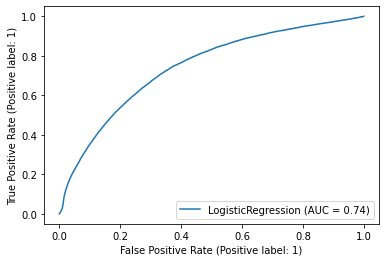

In [42]:
y_train_hat = lr.predict(X_train)
y_train_hat_probs = lr.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))

print('Training AUC: %.4f %%' % train_auc_roc)
#print("F1 :",f1_score(y_train, y_train_hat)*100)
#print("precision :",precision_score(y_train, y_train_hat))
#print("recall :",recall_score(y_train, y_train_hat))
plot_roc_curve(lr, X_train,y_train)
plt.show()

Confusion matrix:
 [[70231   456]
 [ 6097    94]]
Testing AUC: 74.2940 %
Testing accuracy: 91.4761 %
F1 : 0.02788903723483163
precision : 0.1709090909090909
recall : 0.015183330641253432


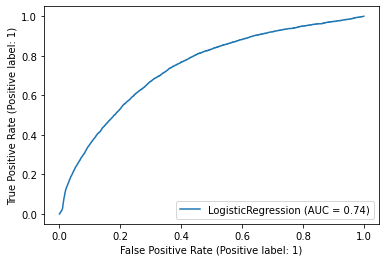

In [43]:
y_test_hat = lr.predict(X_test)
y_test_hat_probs = lr.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy)

print("F1 :",f1_score(y_test, y_test_hat))
print("precision :",precision_score(y_test, y_test_hat))
print("recall :",recall_score(y_test, y_test_hat))
plot_roc_curve(lr, X_test,y_test)
plt.show()

In [44]:
np.sum(y_test_hat)

550

In [45]:
y_test_hat_probs

array([0.05139176, 0.0584096 , 0.07010307, ..., 0.04145859, 0.0597826 ,
       0.06293123])

### Model 2

Balanced Data (50% - Non Default 50 %- Default) No of Features: 33 Features of IV greater than 0.03
Using SMOTE Over sampling

In [46]:
X = train1.drop(columns='TARGET', axis=1) 
y = train1['TARGET']

np.random.seed(45)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
os=SMOTE(random_state=47)
X_train_balanced, Y_train_balanced=os.fit_resample(X_train,y_train)
count=Counter(Y_train_balanced)
print(count)

Counter({0: 211985, 1: 211985})


In [48]:
lr2=LogisticRegression()
lr2.fit(X_train_balanced,Y_train_balanced)

LogisticRegression()

Confusion matrix:
 [[175905  36080]
 [ 33625 178360]]
Scores on Train Data: 
Accuracy : 83.55897822959172
Training AUC: 85.3883 %
F1 : 83.653631939966
precision : 0.8317478082447305
recall : 0.8413802863410147


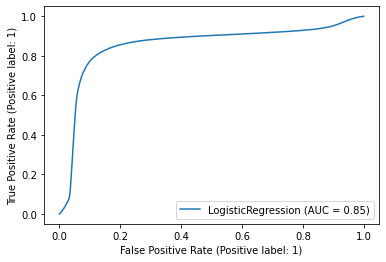

In [50]:
y_train_hat = lr2.predict(X_train_balanced)
y_train_hat_probs = lr2.predict_proba(X_train_balanced)[:,1]

train_accuracy = accuracy_score(Y_train_balanced, y_train_hat)*100
train_auc_roc = roc_auc_score(Y_train_balanced, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(Y_train_balanced, y_train_hat))
print("Scores on Train Data: ")
print("Accuracy :",train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)
print("F1 :",f1_score(Y_train_balanced,y_train_hat)*100)
print("precision :",precision_score(Y_train_balanced,y_train_hat))
print("recall :",recall_score(Y_train_balanced,y_train_hat))
plot_roc_curve(lr2, X_train_balanced,Y_train_balanced)
plt.show()

Confusion matrix:
 [[58590 12111]
 [ 1140  5037]]
Testing AUC: 83.9362 %
Testing accuracy: 82.7636 %
Scores on Test Data: 
Accuracy : 82.763599469289
Test AUC: 83.9362 %
F1 :  43.18971061093248
precision : 0.2937 % 
recall : 0.8154 % 


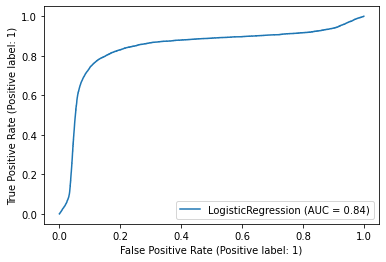

In [52]:
y_test_hat = lr2.predict(X_test)
y_test_hat_probs = lr2.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy)

#print('Confusion matrix:\n', confusion_matrix(Y_train_balanced, y_train_hat))
print("Scores on Test Data: ")
print("Accuracy :",test_accuracy)
print('Test AUC: %.4f %%' % test_auc_roc)
print("F1 : ", f1_score(y_test, y_test_hat)*100)
print("precision : %.4f %% " %precision_score(y_test, y_test_hat))
print("recall : %.4f %% " %recall_score(y_test, y_test_hat))
plot_roc_curve(lr2, X_test,y_test)
plt.show()

In [53]:
len(X_test)

76878

# Model 3

Balanced Data (60% - Non Default 40 %- Default) No of Features: 33 Features of IV greater than 0.03 Using SMOTE Over sampling

In [54]:
X = train1.drop(columns='TARGET', axis=1) 
y = train1['TARGET']

np.random.seed(49)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
os=SMOTE(sampling_strategy=0.4,random_state=42)

X_train_balanced, Y_train_balanced=os.fit_resample(X,y)

In [56]:
count=Counter(Y_train_balanced)
print(count)

Counter({0: 282686, 1: 113074})


In [57]:
lr3=LogisticRegression()
lr3.fit(X_train_balanced,Y_train_balanced)

LogisticRegression()

Confusion matrix:
 [[270000  12686]
 [ 82629  30445]]
Scores on Train Data: 
Accuracy : 75.91595916717202
Training AUC: 80.2805 %
F1 : 38.98082647802567
precision : 0.7058728061023394
recall : 0.2692484567628279


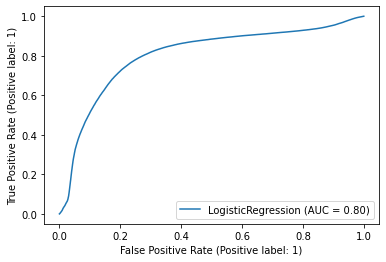

In [59]:
y_train_hat = lr3.predict(X_train_balanced)
y_train_hat_probs = lr3.predict_proba(X_train_balanced)[:,1]

train_accuracy = accuracy_score(Y_train_balanced, y_train_hat)*100
train_auc_roc = roc_auc_score(Y_train_balanced, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(Y_train_balanced, y_train_hat))
print("Scores on Train Data: ")
print("Accuracy :",train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)
print("F1 :",f1_score(Y_train_balanced,y_train_hat)*100)
print("precision :",precision_score(Y_train_balanced,y_train_hat))
print("recall :",recall_score(Y_train_balanced,y_train_hat))
plot_roc_curve(lr3, X_train_balanced,Y_train_balanced)
plt.show()

Confusion matrix:
 [[67615  3142]
 [ 4412  1709]]
Testing AUC: 78.5174 %
Testing accuracy: 90.1740 %
Scores on Test Data: 
Accuracy : 90.17404198860532
Training AUC: 78.5174 %
F1 :  31.152023332118116
precision : 0.3523 % 
recall : 0.2792 % 


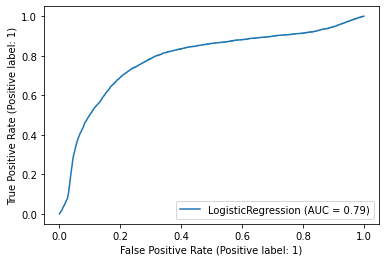

In [60]:
y_test_hat = lr3.predict(X_test)
y_test_hat_probs = lr3.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy)

#print('Confusion matrix:\n', confusion_matrix(Y_train_balanced, y_train_hat))
print("Scores on Test Data: ")
print("Accuracy :",test_accuracy)
print('Training AUC: %.4f %%' % test_auc_roc)
print("F1 : ", f1_score(y_test, y_test_hat)*100)
print("precision : %.4f %% " %precision_score(y_test, y_test_hat))
print("recall : %.4f %% " %recall_score(y_test, y_test_hat))
plot_roc_curve(lr3, X_test,y_test)
plt.show()

# Model 4

Changing all variables into monotonous bins and assigning the feature values as WOE values and using it as predictors to increase the predicting power. (Hoping that monotonous binning might increase the ability of the features)

In [155]:
df2=pd.read_csv("C:\\Users\\Andrew\\OWN_CAR_AGE.csv")
df2

,Unnamed: 0,OWN_CAR_AGE,nsamples,means,bads,goods,dist_good,dist_bad,WOE_OWN_CAR_AGE,IV_components,OWN_CAR_AGE_shift,labels
0,0,91.0,21762.0,0.093558,2036.0,19726.0,0.069781,0.082014,-0.161535,0.001976,-inf,-inf-91.0
1,1,16.0,20352.0,0.084414,1718.0,18634.0,0.065918,0.069204,-0.048658,0.000160,91.0,16.0-91.0
2,2,11.0,230227.0,0.082862,19077.0,211150.0,0.746942,0.768459,-0.028400,0.000611,16.0,11.0-16.0
3,3,6.0,35170.0,0.056696,1994.0,33176.0,0.117360,0.080322,0.379199,0.014045,11.0,6.0-11.0


a = np.array(train2['DAYS_ID_PUBLISH'])
#df2=pd.read_csv("C:\\Users\\Andrew\\DAYS_BIRTH.csv")
b = np.array(df2['DAYS_ID_PUBLISH'])
c = np.array(df2['WOE_DAYS_ID_PUBLISH'])

for i in range(len(a)):                                            # negative
    for j in range(len(b)):
        if a[i]>=b[j]:
            a[i]=c[j]
            break;
        if a[i]<min(b):
            a[i]=max(c)
            break;

In [156]:
a = np.array(train2['OWN_CAR_AGE'])
#df2=pd.read_csv("C:\\Users\\Andrew\\DAYS_BIRTH.csv")
b = np.array(df2['OWN_CAR_AGE'])
c = np.array(df2['WOE_OWN_CAR_AGE'])


if b[-1]-b[0] > 0 :
    for i in range(len(a)):                                              # positive
        for j in range(len(b)):
            if a[i]<=b[j]:
                a[i]=c[j]
                break;
            if a[i]>max(b):
                a[i]=max(c)
                break;
else:
    for i in range(len(a)):                                             # negative
        for j in range(len(b)):
            if a[i]>=b[j]:
                a[i]=c[j]
                break;
            if a[i]<min(b):
                a[i]=max(c)
                break;

In [157]:
a

array([ 0.37919852,  0.37919852, -0.04865849, ...,  0.37919852,
        0.37919852,  0.37919852])

In [159]:
train2['OWN_CAR_AGE']=a

In [160]:
train2.OWN_CAR_AGE.unique()

array([ 0.37919852, -0.04865849, -0.02840017, -0.16153507])

In [161]:
#train2['DAYS_BIRTH']=train1['DAYS_BIRTH']

In [163]:
train2.to_csv("train2.csv")

In [177]:
#print(train2.columns)
cols=[              'SK_ID_CURR',                   'TARGET',               'DAYS_BIRTH',            'DAYS_EMPLOYED',        'DAYS_REGISTRATION',          'DAYS_ID_PUBLISH',              'OWN_CAR_AGE',   'DAYS_LAST_PHONE_CHANGE',     'LIVINGAPARTMENTS_AVG',    'LIVINGAPARTMENTS_MODE',    'LIVINGAPARTMENTS_MEDI',
                    'DAYS_CREDIT',      'DAYS_CREDIT_ENDDATE',        'DAYS_ENDDATE_FACT',   'AMT_CREDIT_MAX_OVERDUE',      'AMT_CREDIT_SUM_DEBT',       'DAYS_CREDIT_UPDATE',           'MONTHS_BALANCE',              'AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT',     'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
        'AMT_INST_MIN_REGULARITY', 'AMT_RECEIVABLE_PRINCIPAL',            'AMT_RECIVABLE',     'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',     'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',          'DAYS_INSTALMENT',       'DAYS_ENTRY_PAYMENT',               'SK_DPD_DEF',            'DAYS_DECISION']

In [181]:
cols.remove('TARGET')

In [193]:
for col in cols:
    name="C:\\Users\\Andrew\\"+col+".csv"
    df2=pd.read_csv(name)
    df2

    a = np.array(train2[col])
    #df2=pd.read_csv("C:\\Users\\Andrew\\DAYS_BIRTH.csv")
    b = np.array(df2[col])
    c = np.array(df2['WOE_'+col])

    if b[-1]-b[0] > 0 :
        for i in range(len(a)):                                              # positive
            for j in range(len(b)):
                if a[i]<=b[j]:
                    a[i]=c[j]
                    break;
                if a[i]>max(b):
                    a[i]=max(c)
                    break;
    else:
        for i in range(len(a)):                                             # negative
            for j in range(len(b)):
                if a[i]>=b[j]:
                    a[i]=c[j]
                    break;
                if a[i]<min(b):
                    a[i]=max(c)
                    break;
    train2[col]=a

In [185]:
df2

,Unnamed: 0,DAYS_DECISION,nsamples,means,bads,goods,dist_good,dist_bad,WOE_DAYS_DECISION,IV_components,DAYS_DECISION_shift,labels
0,0,-2.000000,113.0,0.150442,17.0,96.0,0.000340,0.000685,-0.701351,0.000242,-inf,-inf--2.0
1,1,-23.600000,728.0,0.129121,94.0,634.0,0.002243,0.003787,-0.523731,0.000809,-2.000000,-23.6--2.0
2,2,-96.500000,117192.0,0.117303,13747.0,103445.0,0.365936,0.553756,-0.414266,0.077808,-23.600000,-96.5--23.6
3,3,-703.833333,1968.0,0.102134,201.0,1767.0,0.006251,0.008097,-0.258752,0.000478,-96.500000,-703.8333333333334--96.5
4,4,-713.571429,11296.0,0.083392,942.0,10354.0,0.036627,0.037946,-0.035363,0.000047,-703.833333,-713.5714285714286--703.8333333333334
5,5,-771.533333,7552.0,0.077463,585.0,6967.0,0.024646,0.023565,0.044843,0.000048,-713.571429,-771.5333333333333--713.5714285714286
6,6,-811.454545,2285.0,0.072210,165.0,2120.0,0.007499,0.006647,0.120740,0.000103,-771.533333,-811.4545454545455--771.5333333333333
7,7,-824.000000,166377.0,0.054539,9074.0,157303.0,0.556458,0.365519,0.420275,0.080247,-811.454545,-824.0--811.4545454545455


In [184]:
name

'C:\\Users\\Andrew\\DAYS_DECISION.csv'

In [187]:
train2.drop([307510],axis=1,inplace=True)

In [191]:
train2=train1.copy()

In [195]:
train2.to_csv("Train_woe",index=False)

In [164]:
train2

,SK_ID_CURR,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,AMT_BALANCE,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_POS_CURRENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,SK_DPD_DEF,DAYS_DECISION
0,100002,1,-0.328804,-0.037457,-0.059896,-0.058752,0.379199,-1134.0,0.0202,0.0220,0.0205,-874.000000,-349.000000,-697.500000,1681.029000,49156.2000,-499.875000,-9.500000,88783.40550,8531.250000,15692.30769,1406.250000,4155.1950,84960.90000,87888.88500,87888.88500,0.50,1.333333,0.291667,-295.000000,-315.421053,0.000000,-606.000000
1,100003,0,0.123244,-0.037457,-0.076963,-0.242071,0.379199,-828.0,0.0773,0.0790,0.0787,-1400.750000,-544.500000,-1097.333333,0.000000,0.0000,-816.000000,-16.114286,60909.64759,4285.714286,10005.61500,244.157143,3375.9405,58342.17273,60502.85005,60530.58094,0.25,0.583333,0.033333,-1378.160000,-1385.320000,0.000000,-1305.000000
2,100004,0,0.229841,-0.037457,-0.059896,-0.058752,-0.048658,-815.0,0.0504,0.0551,0.0513,-867.000000,-488.500000,-532.500000,0.000000,0.0000,-532.000000,-16.114286,60909.64759,4285.714286,10005.61500,244.157143,3375.9405,58342.17273,60502.85005,60530.58094,0.25,0.583333,0.033333,-754.000000,-761.666667,0.000000,-815.000000
3,100006,0,0.229841,0.209564,0.357220,-0.058752,0.379199,-617.0,0.0504,0.0551,0.0513,-1067.000000,607.254748,-978.276549,5024.772645,160487.4360,-492.800000,-16.114286,60909.64759,4285.714286,10005.61500,244.157143,3375.9405,58342.17273,60502.85005,60530.58094,0.25,0.583333,0.033333,-252.250000,-271.625000,0.000000,-272.444444
4,100007,0,0.369867,0.209564,-0.059896,0.059946,0.379199,-1106.0,0.0504,0.0551,0.0513,-1149.000000,-783.000000,-783.000000,0.000000,0.0000,-783.000000,-16.114286,60909.64759,4285.714286,10005.61500,244.157143,3375.9405,58342.17273,60502.85005,60530.58094,0.25,0.583333,0.033333,-1028.606061,-1032.242424,0.000000,-1222.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,-0.328804,-0.037457,0.244465,-0.058752,0.379199,-273.0,0.1484,0.0882,0.1509,-1067.000000,607.254748,-978.276549,5024.772645,160487.4360,-492.800000,-16.114286,60909.64759,4285.714286,10005.61500,244.157143,3375.9405,58342.17273,60502.85005,60530.58094,0.25,0.583333,0.033333,-120.000000,-156.285714,0.000000,-273.000000
307507,456252,0,0.445823,-0.130515,-0.059896,0.257237,0.379199,0.0,0.0202,0.0220,0.0205,-1067.000000,607.254748,-978.276549,5024.772645,160487.4360,-492.800000,-16.114286,60909.64759,4285.714286,10005.61500,244.157143,3375.9405,58342.17273,60502.85005,60530.58094,0.25,0.583333,0.033333,-2391.000000,-2393.833333,0.000000,-2497.000000
307508,456253,0,0.050565,0.744499,0.083065,0.535955,0.379199,-1909.0,0.0841,0.0918,0.0855,-867.500000,280.500000,-794.000000,5024.772645,448958.2500,-253.250000,-16.114286,60909.64759,4285.714286,10005.61500,244.157143,3375.9405,58342.17273,60502.85005,60530.58094,0.25,0.583333,0.033333,-2372.928571,-2387.428571,0.294118,-2380.000000
307509,456254,1,-0.190004,0.526347,-0.059896,-0.192583,0.379199,-322.0,0.0672,0.0735,0.0684,-1104.000000,-859.000000,-859.000000,7799.731343,0.0000,-401.000000,-9.500000,88783.40550,8531.250000,15692.30769,1406.250000,4155.1950,84960.90000,87888.88500,87888.88500,0.50,1.333333,0.291667,-142.263158,-161.263158,0.000000,-299.500000


In [76]:
 cols=[]
for i in train1.columns:
    if(len(train1[i].unique())>1):
        cols.append(i)

print(len(cols))
cols

33


['SK_ID_CURR',
 'TARGET',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'DAYS_LAST_PHONE_CHANGE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'DAYS_CREDIT',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'AMT_CREDIT_SUM_DEBT',
 'DAYS_CREDIT_UPDATE',
 'MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'DAYS_INSTALMENT',
 'DAYS_ENTRY_PAYMENT',
 'SK_DPD_DEF',
 'DAYS_DECISION']

In [97]:
iv=[]
#bins=[]
for i in cols:
    var = i # variable to be binned
    y_var = "TARGET" # the target variable

    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    bin_object.fit(train1[[y_var, var]])

    # Print WOE summary
    print(i,": ",np.sum(bin_object.woe_summary['IV_components']))
    iv.append(np.sum(bin_object.woe_summary['IV_components']))
    print(var)
    print(pd.DataFrame(bin_object.bins))
    #bins.append(bin_object.bins)
    name=var+".csv"
    bin_object.woe_summary.to_csv(name)

DAYS_BIRTH :  0.09067040556096848
DAYS_BIRTH
          0
0      -inf
1  -24780.0
2  -23813.0
3  -23300.0
4  -21850.0
5  -20636.0
6  -20012.0
7  -19866.0
8  -19328.0
9  -18322.0
10 -17373.0
11 -16365.0
12 -15343.0
13 -14641.0
14 -14018.0
15 -13427.0
16 -12726.0
17 -11679.0
18 -11449.0
19 -11014.0
20  -8932.0
21  -8609.0
22  -7489.0
23      inf
DAYS_EMPLOYED :  0.05189537592280534
DAYS_EMPLOYED
           0
0       -inf
1   -12971.0
2   -12235.0
3    -9508.0
4    -6818.0
5    -5444.0
6    -4651.0
7    -3924.0
8    -3213.0
9    -3076.0
10   -2448.0
11   -2051.0
12   -1790.0
13  365243.0
14       inf
DAYS_REGISTRATION :  0.03042137540930878
DAYS_REGISTRATION
          0
0      -inf
1  -14340.0
2  -12839.0
3   -9881.0
4   -9377.0
5   -9042.0
6   -7419.0
7   -6942.0
8   -5710.0
9   -5545.0
10  -4915.0
11  -1542.0
12  -1023.0
13   -891.0
14   -536.0
15    -12.0
16     -3.0
17      0.0
18      inf
DAYS_ID_PUBLISH :  0.04054107190010071
DAYS_ID_PUBLISH
         0
0     -inf
1  -5778.0
2  -4741.

In [79]:
train1.describe()

,SK_ID_CURR,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,AMT_BALANCE,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_POS_CURRENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,SK_DPD_DEF,DAYS_DECISION
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,-16036.995067,63815.045904,-4986.120328,-2994.202373,8.721236,-962.855659,0.067331,0.072179,0.068337,-1077.392248,653.927061,-967.764654,5.248792e+03,1.603861e+05,-536.840364,-17.050543,70714.527538,6097.692849,1.226474e+04,1898.657952,3775.210135,67814.951681,70224.820106,70246.524269,0.326993,0.946086,0.387136,-903.994374,-915.298798,0.214594,-922.680658
std,102790.175348,0.272419,4363.988632,141275.766519,3522.886321,1509.450419,7.366967,826.808964,0.056966,0.059737,0.057566,522.303881,3025.530682,464.363933,2.369436e+05,4.806432e+05,421.020515,8.449641,55023.234348,9891.647803,1.371866e+04,10420.367564,2531.503888,53182.460656,54714.428660,54711.384651,0.406653,1.982328,2.007783,583.354733,581.967661,12.540844,542.578572
min,100002.000000,0.000000,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,-2922.000000,-41875.000000,-8376.500000,0.000000e+00,-1.083615e+06,-41890.000000,-50.179775,-2930.232558,0.000000,0.000000e+00,0.000000,0.000000,-2930.232558,-2930.232558,-2930.232558,0.000000,0.000000,0.000000,-2922.000000,-3071.000000,0.000000,-2922.000000
25%,189145.500000,0.000000,-19682.000000,-2760.000000,-7479.500000,-4299.000000,7.000000,-1570.000000,0.050400,0.055100,0.051300,-1362.600000,-594.500000,-1158.000000,0.000000e+00,4.172705e+03,-721.000000,-16.114286,60909.647590,4285.714286,1.000561e+04,244.157143,3375.940500,58342.172730,60502.850050,60530.580940,0.250000,0.583333,0.033333,-1271.479841,-1281.587121,0.000000,-1198.000000
50%,278202.000000,0.000000,-15750.000000,-1213.000000,-4504.000000,-3254.000000,7.000000,-757.000000,0.050400,0.055100,0.051300,-1067.000000,59.333333,-978.276549,4.346438e+03,7.234409e+04,-492.800000,-16.114286,60909.647590,4285.714286,1.000561e+04,244.157143,3375.940500,58342.172730,60502.850050,60530.580940,0.250000,0.583333,0.033333,-808.272546,-819.955610,0.000000,-824.000000
75%,367142.500000,0.000000,-12413.000000,-289.000000,-2010.000000,-1720.000000,7.000000,-274.000000,0.063900,0.066100,0.064100,-734.633333,607.254748,-699.354167,5.024773e+03,1.604874e+05,-256.000000,-16.114286,60909.647590,4285.714286,1.000561e+04,244.157143,3375.940500,58342.172730,60502.850050,60530.580940,0.250000,0.583333,0.033333,-438.000000,-450.500000,0.000000,-520.500000
max,456255.000000,1.000000,-7489.000000,365243.000000,0.000000,0.000000,91.000000,0.000000,1.000000,1.000000,1.000000,0.000000,31198.000000,0.000000,1.159872e+08,4.365000e+07,14.000000,-1.000000,928686.323600,904500.000000,1.125000e+06,918645.459800,43014.126430,884547.880700,913096.639300,913096.639300,35.000000,118.250000,118.250000,-3.000000,-3.000000,1740.554455,-2.000000


In [84]:
bin_object.woe_summary['WOE_DAYS_INSTALMENT']

0   -0.609954
1   -0.431174
2   -0.361238
3   -0.295210
4   -0.255352
5   -0.075263
6   -0.005522
7    0.084293
8    0.165083
9    0.284751
Name: WOE_DAYS_INSTALMENT, dtype: float64

In [85]:
bin_object.woe_summary['IV_components']

0    0.000180
1    0.008803
2    0.007434
3    0.001155
4    0.021831
5    0.000045
6    0.000002
7    0.000063
8    0.000069
9    0.037152
Name: IV_components, dtype: float64

In [92]:
type(bin_object.woe_summary)

pandas.core.frame.DataFrame

In [95]:
cols.remove('TARGET')
cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'DAYS_LAST_PHONE_CHANGE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'DAYS_CREDIT',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'AMT_CREDIT_SUM_DEBT',
 'DAYS_CREDIT_UPDATE',
 'MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'DAYS_INSTALMENT',
 'DAYS_ENTRY_PAYMENT',
 'SK_DPD_DEF',
 'DAYS_DECISION']

In [62]:
train2=pd.read_csv("Train_woe.csv")

In [63]:
X = train2.drop(columns='TARGET', axis=1) 
y = train2['TARGET']

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [64]:
os=SMOTE(random_state=42)

X_train_balanced, Y_train_balanced=os.fit_resample(X,y)

In [65]:
count=Counter(Y_train_balanced)
print(count)

Counter({1: 282686, 0: 282686})


In [66]:
lr4=LogisticRegression()
lr4.fit(X_train_balanced,Y_train_balanced)

LogisticRegression()

Confusion matrix:
 [[269624  13062]
 [ 20532 262154]]
Scores on Train Data: 
Accuracy : 94.05807149982667
Training AUC: 98.3293 %
F1 : 93.97851235521651
precision : 0.9525390965641533
recall : 0.9273681752898977


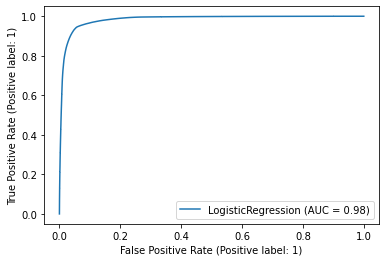

In [67]:
y_train_hat = lr4.predict(X_train_balanced)
y_train_hat_probs = lr4.predict_proba(X_train_balanced)[:,1]

train_accuracy = accuracy_score(Y_train_balanced, y_train_hat)*100
train_auc_roc = roc_auc_score(Y_train_balanced, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(Y_train_balanced, y_train_hat))
print("Scores on Train Data: ")
print("Accuracy :",train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)
print("F1 :",f1_score(Y_train_balanced,y_train_hat)*100)
print("precision :",precision_score(Y_train_balanced,y_train_hat))
print("recall :",recall_score(Y_train_balanced,y_train_hat))
plot_roc_curve(lr4, X_train_balanced,Y_train_balanced)
plt.show()

Confusion matrix:
 [[67423  3264]
 [  608  5583]]
Testing AUC: 97.9190 %
Testing accuracy: 94.9634 %


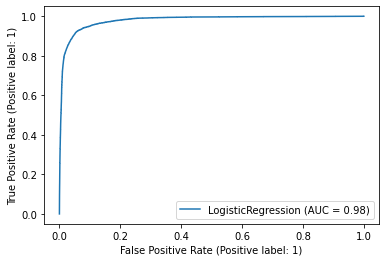

Scores on Test Data: 
Accuracy : 94.96344858086839
Test AUC: 97.9190 %
F1 :  74.25189519882962
precision : 0.6311 % 
recall : 0.9018 % 


In [69]:
y_test_hat = lr4.predict(X_test)
y_test_hat_probs = lr4.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy)
plot_roc_curve(lr4, X_test,y_test)
plt.show()

#print('Confusion matrix:\n', confusion_matrix(Y_train_balanced, y_train_hat))
print("Scores on Test Data: ")
print("Accuracy :",test_accuracy)
print('Test AUC: %.4f %%' % test_auc_roc)
print("F1 : ", f1_score(y_test, y_test_hat)*100)
print("precision : %.4f %% " %precision_score(y_test, y_test_hat))
print("recall : %.4f %% " %recall_score(y_test, y_test_hat))

In [304]:
pd.DataFrame(y_test).to_clipboard()

In [306]:
pd.DataFrame(y_test_hat).to_clipboard()

In [305]:
pd.DataFrame(y_test_hat_probs).to_clipboard()

In [70]:
from scipy import stats

In [82]:
stats.somersd(y_test, y_test_hat)

SomersDResult(statistic=0.8556175322846274, pvalue=0.0, table=array([[67423,  3264],
       [  608,  5583]]))

In [80]:
lr4.score(X_test,y_test)

0.9496344858086839

### Model 5

In [88]:
train2

,SK_ID_CURR,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,AMT_BALANCE,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_POS_CURRENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,SK_DPD_DEF,DAYS_DECISION
0,100002,1,-0.328804,-0.037457,-0.059896,-0.058752,0.379199,0.140336,2.174877,2.124361,2.171624,0.099802,0.377295,0.124148,0.663858,0.003183,0.631389,-0.375994,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,-0.290950,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,-0.258752
1,100003,0,0.123244,-0.037457,-0.076963,-0.242071,0.379199,0.020453,0.132952,0.138692,0.128308,0.681967,0.377295,0.855181,0.663858,0.623871,0.631389,2.418445,2.279429,2.308569,2.334442,2.198612,2.187432,2.275479,2.274280,2.275136,2.382533,2.440983,2.251920,0.284751,0.286942,0.101095,0.420275
2,100004,0,0.229841,-0.037457,-0.059896,-0.058752,-0.048658,0.020453,2.174877,2.124361,2.171624,0.099802,0.377295,0.124148,0.663858,0.623871,0.631389,2.418445,2.279429,2.308569,2.334442,2.198612,2.187432,2.275479,2.274280,2.275136,2.382533,2.440983,2.251920,0.084293,0.058152,0.101095,0.420275
3,100006,0,0.229841,0.209564,0.357220,-0.058752,0.379199,-0.102765,2.174877,2.124361,2.171624,0.681967,0.377295,0.855181,0.663858,-0.122778,0.631389,2.418445,2.279429,2.308569,2.334442,2.198612,2.187432,2.275479,2.274280,2.275136,2.382533,2.440983,2.251920,-0.075263,-0.061830,0.101095,-0.258752
4,100007,0,0.369867,0.209564,-0.059896,0.059946,0.379199,0.092286,2.174877,2.124361,2.171624,0.681967,0.447588,0.124148,0.663858,0.623871,0.631389,2.418445,2.279429,2.308569,2.334442,2.198612,2.187432,2.275479,2.274280,2.275136,2.382533,2.440983,2.251920,0.284751,0.286942,0.101095,0.420275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,-0.328804,-0.037457,0.244465,-0.058752,0.379199,-0.152838,0.132952,0.138692,0.128308,0.681967,0.377295,0.855181,0.663858,-0.122778,0.631389,2.418445,2.279429,2.308569,2.334442,2.198612,2.187432,2.275479,2.274280,2.275136,2.382533,2.440983,2.251920,-0.361238,-0.284692,0.101095,-0.258752
307507,456252,0,0.445823,-0.130515,-0.059896,0.257237,0.379199,-0.197472,2.174877,2.124361,2.171624,0.681967,0.377295,0.855181,0.663858,-0.122778,0.631389,2.418445,2.279429,2.308569,2.334442,2.198612,2.187432,2.275479,2.274280,2.275136,2.382533,2.440983,2.251920,0.284751,0.286942,0.101095,0.420275
307508,456253,0,0.050565,0.744499,0.083065,0.535955,0.379199,0.339693,0.132952,0.138692,0.128308,0.099802,0.377295,0.124148,0.663858,-0.122778,0.033905,2.418445,2.279429,2.308569,2.334442,2.198612,2.187432,2.275479,2.274280,2.275136,2.382533,2.440983,2.251920,0.284751,0.286942,0.101095,0.420275
307509,456254,1,-0.190004,0.526347,-0.059896,-0.192583,0.379199,-0.152838,0.132952,0.138692,0.128308,0.681967,0.447588,0.285658,-0.837436,0.623871,0.155824,-0.375994,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,-0.290950,-0.582618,-0.708444,-0.361238,-0.284692,0.101095,-0.258752


In [85]:
X = train2.drop(columns=['TARGET','OWN_CAR_AGE'], axis=1) 
y = train2['TARGET']

np.random.seed(49)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [89]:
os=SMOTE(random_state=47)

X_train_balanced, Y_train_balanced=os.fit_resample(X,y)

In [90]:
count=Counter(Y_train_balanced)
print(count)

Counter({1: 282686, 0: 282686})


In [91]:
Y_train_balanced

0         1
1         0
2         0
3         0
4         0
         ..
565367    1
565368    1
565369    1
565370    1
565371    1
Name: TARGET, Length: 565372, dtype: int64

In [92]:
lr5=LogisticRegression()
lr5.fit(X_train_balanced,Y_train_balanced)

LogisticRegression()

In [93]:
y_train_hat = lr5.predict(X_train_balanced)
y_train_hat_probs = lr5.predict_proba(X_train_balanced)[:,1]

train_accuracy = accuracy_score(Y_train_balanced, y_train_hat)*100
train_auc_roc = roc_auc_score(Y_train_balanced, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(Y_train_balanced, y_train_hat))
print("Scores on Train Data: ")
print("Accuracy :",train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)
print("F1 :",f1_score(Y_train_balanced,y_train_hat)*100)
print("precision :",precision_score(Y_train_balanced,y_train_hat))
print("recall :",recall_score(Y_train_balanced,y_train_hat))

Confusion matrix:
 [[260620  22066]
 [ 21788 260898]]
Scores on Train Data: 
Accuracy : 92.24333713024345
Training AUC: 97.2160 %
F1 : 92.24714929726863
precision : 0.9220183486238532
recall : 0.9229250829542319


In [94]:
y_test_hat = lr5.predict(X_test)
y_test_hat_probs = lr5.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy)

#print('Confusion matrix:\n', confusion_matrix(Y_train_balanced, y_train_hat))
print("Scores on Test Data: ")
print("Accuracy :",test_accuracy)
print('Training AUC: %.4f %%' % test_auc_roc)
print("F1 : ", f1_score(y_test, y_test_hat)*100)
print("precision : %.4f %% " %precision_score(y_test, y_test_hat))
print("recall : %.4f %% " %recall_score(y_test, y_test_hat))

Confusion matrix:
 [[65217  5540]
 [  616  5505]]
Testing AUC: 96.0084 %
Testing accuracy: 91.9925 %
Scores on Test Data: 
Accuracy : 91.99250760945914
Training AUC: 96.0084 %
F1 :  64.13841314225796
precision : 0.4984 % 
recall : 0.8994 % 


In [72]:
y_test

245895    0
98194     0
36463     0
249923    0
158389    0
         ..
77581     0
16991     1
114630    0
158100    0
247813    0
Name: TARGET, Length: 76878, dtype: int64

In [95]:
train2.columns

Index(['SK_ID_CURR', 'TARGET', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'AMT_CREDIT_SUM_DEBT', 'DAYS_CREDIT_UPDATE', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'SK_DPD_DEF', 'DAYS_DECISION'],
      dtype='object')

In [ ]:
Test_data_for_model

In [107]:
#print(train2.columns)
cols=[              'SK_ID_CURR',                   'TARGET',               'DAYS_BIRTH',            'DAYS_EMPLOYED',        'DAYS_REGISTRATION',          'DAYS_ID_PUBLISH',              'OWN_CAR_AGE',   'DAYS_LAST_PHONE_CHANGE',     'LIVINGAPARTMENTS_AVG',    'LIVINGAPARTMENTS_MODE',    'LIVINGAPARTMENTS_MEDI',
                    'DAYS_CREDIT',      'DAYS_CREDIT_ENDDATE',        'DAYS_ENDDATE_FACT',   'AMT_CREDIT_MAX_OVERDUE',      'AMT_CREDIT_SUM_DEBT',       'DAYS_CREDIT_UPDATE',           'MONTHS_BALANCE',              'AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT',     'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
        'AMT_INST_MIN_REGULARITY', 'AMT_RECEIVABLE_PRINCIPAL',            'AMT_RECIVABLE',     'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',     'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',          'DAYS_INSTALMENT',       'DAYS_ENTRY_PAYMENT',               'SK_DPD_DEF',            'DAYS_DECISION']

In [108]:
cols.remove('TARGET')

In [109]:
for col in cols:
    name="C:\\Users\\Andrew\\"+col+".csv"
    df2=pd.read_csv(name)
    df2

    a = np.array(test[col])
    #df2=pd.read_csv("C:\\Users\\Andrew\\DAYS_BIRTH.csv")
    b = np.array(df2[col])
    c = np.array(df2['WOE_'+col])

    if b[-1]-b[0] > 0 :
        for i in range(len(a)):                                              # positive
            for j in range(len(b)):
                if a[i]<=b[j]:
                    a[i]=c[j]
                    break;
                if a[i]>max(b):
                    a[i]=max(c)
                    break;
    else:
        for i in range(len(a)):                                             # negative
            for j in range(len(b)):
                if a[i]>=b[j]:
                    a[i]=c[j]
                    break;
                if a[i]<min(b):
                    a[i]=max(c)
                    break;
    test[col]=a

In [100]:
test_cols=['SK_ID_CURR',  'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'AMT_CREDIT_SUM_DEBT', 'DAYS_CREDIT_UPDATE', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'SK_DPD_DEF', 'DAYS_DECISION']

In [101]:
test=test[test_cols]

In [105]:
test['SK_ID_CURR']=test['SK_ID_CURR'].astype(int)

In [106]:
test

,SK_ID_CURR,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,AMT_BALANCE,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_POS_CURRENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,SK_DPD_DEF,DAYS_DECISION
0,100001,-19241.0,-2329.0,-5170.0,-812.0,13.0,-1740.0,0.12695,0.13865,0.12915,-735.000000,82.428571,-825.500000,4709.250000,85240.928571,-93.142857,-22.720197,93926.435167,10419.585199,17723.095291,8805.64749,4792.585910,90476.984900,93304.005369,93308.205012,0.437762,2.061393,1.814677,-2187.714286,-2195.000000,0.777778,-1740.000000
1,100005,-18064.0,-4469.0,-9118.0,-1623.0,10.0,0.0,0.06305,0.06885,0.06410,-190.666667,439.333333,-123.000000,0.000000,189469.500000,-54.333333,-22.720197,93926.435167,10419.585199,17723.095291,8805.64749,4792.585910,90476.984900,93304.005369,93308.205012,0.437762,2.061393,1.814677,-586.000000,-609.555556,0.000000,-536.000000
2,100013,-20038.0,-4458.0,-2175.0,-3503.0,5.0,-856.0,0.29670,0.32415,0.30185,-1737.500000,-1068.000000,-1054.750000,19305.000000,0.000000,-775.500000,-48.500000,18159.919219,6350.000000,5953.125000,0.00000,1454.539551,17255.559844,18101.079844,18101.079844,0.255556,0.239583,0.000000,-1352.929032,-1358.109677,0.000000,-837.500000
3,100028,-13976.0,-1866.0,-2000.0,-4208.0,13.0,-1805.0,0.24040,0.26260,0.24460,-1401.750000,2387.700000,-1238.285714,0.000000,18630.450000,-651.500000,-25.000000,8085.058163,613.636364,6156.400408,6242.35500,6133.363929,7680.352041,7968.609184,7968.609184,0.045455,2.387755,2.613636,-855.548673,-858.548673,0.000000,-1124.200000
4,100038,-13040.0,-2191.0,-4000.0,-4262.0,16.0,-821.0,0.18950,0.14280,0.19280,-1088.502807,728.461221,-946.991961,3503.427054,169347.869674,-520.135976,-22.720197,93926.435167,10419.585199,17723.095291,8805.64749,4792.585910,90476.984900,93304.005369,93308.205012,0.437762,2.061393,1.814677,-622.000000,-634.250000,0.000000,-466.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,-19970.0,-5169.0,-9094.0,-3399.0,6.5,-684.0,0.03215,0.02985,0.03270,-727.200000,7.000000,-457.666667,11427.750000,111294.000000,-282.200000,-22.720197,93926.435167,10419.585199,17723.095291,8805.64749,4792.585910,90476.984900,93304.005369,93308.205012,0.437762,2.061393,1.814677,-623.000000,-630.333333,0.000000,-929.134298
48740,456222,-11186.0,-1149.0,-3015.0,-3003.0,2.0,0.0,0.13155,0.14370,0.13385,-1088.502807,728.461221,-946.991961,3503.427054,169347.869674,-520.135976,-22.720197,93926.435167,10419.585199,17723.095291,8805.64749,4792.585910,90476.984900,93304.005369,93308.205012,0.437762,2.061393,1.814677,-987.232877,-992.712329,0.000000,-1552.500000
48741,456223,-15922.0,-3037.0,-2681.0,-1504.0,4.0,-838.0,0.16725,0.18275,0.17015,-539.000000,-382.250000,-412.750000,0.000000,4268.700000,-308.400000,-22.720197,93926.435167,10419.585199,17723.095291,8805.64749,4792.585910,90476.984900,93304.005369,93308.205012,0.437762,2.061393,1.814677,-554.750000,-586.375000,0.000000,-461.000000
48742,456224,-13968.0,-2731.0,-1461.0,-1364.0,16.0,-2308.0,0.08445,0.09225,0.08595,-1755.823529,-865.875000,-1530.909091,1492.488000,52511.904000,-907.823529,-22.720197,93926.435167,10419.585199,17723.095291,8805.64749,4792.585910,90476.984900,93304.005369,93308.205012,0.437762,2.061393,1.814677,-917.724138,-924.965517,0.000000,-1283.600000


In [110]:
test

,SK_ID_CURR,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,AMT_BALANCE,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_POS_CURRENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,SK_DPD_DEF,DAYS_DECISION
0,0,0.229841,0.129189,-0.022195,-0.222254,-0.028400,0.301208,0.132952,0.138692,0.128308,-0.004011,0.377295,0.179911,0.663858,-0.122778,0.033905,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,0.284751,0.286942,-0.566618,0.420275
1,0,0.163851,0.418509,0.331320,-0.103647,0.379199,-0.197472,2.174877,2.124361,2.171624,-0.004011,0.377295,0.124148,0.663858,-0.122778,0.033905,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,-0.258752
2,0,0.420354,0.418509,-0.059896,0.059946,0.379199,0.020453,0.132952,0.138692,0.128308,0.681967,0.447588,0.855181,-0.837436,0.623871,0.631389,2.418445,2.279429,-0.066777,2.334442,2.198612,2.187432,2.275479,2.274280,2.275136,2.382533,2.440983,2.251920,0.284751,0.286942,0.101095,0.420275
3,0,-0.040157,0.030295,-0.059896,0.257237,-0.028400,0.301208,0.132952,0.138692,0.128308,0.681967,-0.234699,0.855181,0.663858,0.192285,0.631389,2.418445,2.279429,2.308569,2.334442,-0.683286,-0.455853,2.275479,2.274280,2.275136,2.382533,-0.582618,-0.708444,0.284751,0.286942,0.101095,0.420275
4,0,-0.100388,0.129189,-0.059896,0.299436,-0.048658,0.020453,0.132952,0.138692,0.128308,0.681967,-0.028340,0.285658,0.663858,-0.122778,0.631389,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,-0.258752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,0.369867,0.526347,0.331320,0.030532,0.379199,-0.102765,2.174877,2.124361,2.171624,-0.004011,0.377295,0.124148,-0.837436,-0.122778,0.033905,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,0.420275
48740,0,-0.293553,-0.037457,-0.059896,0.006092,0.379199,-0.197472,0.132952,0.138692,0.128308,0.681967,-0.028340,0.285658,0.663858,-0.122778,0.631389,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,0.284751,0.286942,0.101095,0.420275
48741,0,0.066295,0.209564,-0.059896,-0.177987,0.379199,0.020453,0.132952,0.138692,0.128308,-0.004011,0.377295,0.124148,0.663858,0.272237,0.033905,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,-0.258752
48742,0,-0.040157,0.209564,-0.076963,-0.177987,-0.048658,0.489422,0.132952,0.138692,0.128308,0.681967,0.447588,0.855181,0.663858,0.003183,0.631389,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,0.284751,0.286942,0.101095,0.420275


In [111]:
test2=pd.read_csv("Test_data_for_model.csv")

In [112]:
test['SK_ID_CURR']=test2['SK_ID_CURR']

In [113]:
test

,SK_ID_CURR,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,AMT_BALANCE,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_POS_CURRENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,SK_DPD_DEF,DAYS_DECISION
0,100001.0,0.229841,0.129189,-0.022195,-0.222254,-0.028400,0.301208,0.132952,0.138692,0.128308,-0.004011,0.377295,0.179911,0.663858,-0.122778,0.033905,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,0.284751,0.286942,-0.566618,0.420275
1,100005.0,0.163851,0.418509,0.331320,-0.103647,0.379199,-0.197472,2.174877,2.124361,2.171624,-0.004011,0.377295,0.124148,0.663858,-0.122778,0.033905,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,-0.258752
2,100013.0,0.420354,0.418509,-0.059896,0.059946,0.379199,0.020453,0.132952,0.138692,0.128308,0.681967,0.447588,0.855181,-0.837436,0.623871,0.631389,2.418445,2.279429,-0.066777,2.334442,2.198612,2.187432,2.275479,2.274280,2.275136,2.382533,2.440983,2.251920,0.284751,0.286942,0.101095,0.420275
3,100028.0,-0.040157,0.030295,-0.059896,0.257237,-0.028400,0.301208,0.132952,0.138692,0.128308,0.681967,-0.234699,0.855181,0.663858,0.192285,0.631389,2.418445,2.279429,2.308569,2.334442,-0.683286,-0.455853,2.275479,2.274280,2.275136,2.382533,-0.582618,-0.708444,0.284751,0.286942,0.101095,0.420275
4,100038.0,-0.100388,0.129189,-0.059896,0.299436,-0.048658,0.020453,0.132952,0.138692,0.128308,0.681967,-0.028340,0.285658,0.663858,-0.122778,0.631389,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,-0.258752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221.0,0.369867,0.526347,0.331320,0.030532,0.379199,-0.102765,2.174877,2.124361,2.171624,-0.004011,0.377295,0.124148,-0.837436,-0.122778,0.033905,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,0.420275
48740,456222.0,-0.293553,-0.037457,-0.059896,0.006092,0.379199,-0.197472,0.132952,0.138692,0.128308,0.681967,-0.028340,0.285658,0.663858,-0.122778,0.631389,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,0.284751,0.286942,0.101095,0.420275
48741,456223.0,0.066295,0.209564,-0.059896,-0.177987,0.379199,0.020453,0.132952,0.138692,0.128308,-0.004011,0.377295,0.124148,0.663858,0.272237,0.033905,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,-0.258752
48742,456224.0,-0.040157,0.209564,-0.076963,-0.177987,-0.048658,0.489422,0.132952,0.138692,0.128308,0.681967,0.447588,0.855181,0.663858,0.003183,0.631389,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,0.284751,0.286942,0.101095,0.420275


In [114]:
test['SK_ID_CURR']=test['SK_ID_CURR'].astype(int)

In [115]:
test

,SK_ID_CURR,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,AMT_BALANCE,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_POS_CURRENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,SK_DPD_DEF,DAYS_DECISION
0,100001,0.229841,0.129189,-0.022195,-0.222254,-0.028400,0.301208,0.132952,0.138692,0.128308,-0.004011,0.377295,0.179911,0.663858,-0.122778,0.033905,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,0.284751,0.286942,-0.566618,0.420275
1,100005,0.163851,0.418509,0.331320,-0.103647,0.379199,-0.197472,2.174877,2.124361,2.171624,-0.004011,0.377295,0.124148,0.663858,-0.122778,0.033905,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,-0.258752
2,100013,0.420354,0.418509,-0.059896,0.059946,0.379199,0.020453,0.132952,0.138692,0.128308,0.681967,0.447588,0.855181,-0.837436,0.623871,0.631389,2.418445,2.279429,-0.066777,2.334442,2.198612,2.187432,2.275479,2.274280,2.275136,2.382533,2.440983,2.251920,0.284751,0.286942,0.101095,0.420275
3,100028,-0.040157,0.030295,-0.059896,0.257237,-0.028400,0.301208,0.132952,0.138692,0.128308,0.681967,-0.234699,0.855181,0.663858,0.192285,0.631389,2.418445,2.279429,2.308569,2.334442,-0.683286,-0.455853,2.275479,2.274280,2.275136,2.382533,-0.582618,-0.708444,0.284751,0.286942,0.101095,0.420275
4,100038,-0.100388,0.129189,-0.059896,0.299436,-0.048658,0.020453,0.132952,0.138692,0.128308,0.681967,-0.028340,0.285658,0.663858,-0.122778,0.631389,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,-0.258752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0.369867,0.526347,0.331320,0.030532,0.379199,-0.102765,2.174877,2.124361,2.171624,-0.004011,0.377295,0.124148,-0.837436,-0.122778,0.033905,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,0.420275
48740,456222,-0.293553,-0.037457,-0.059896,0.006092,0.379199,-0.197472,0.132952,0.138692,0.128308,0.681967,-0.028340,0.285658,0.663858,-0.122778,0.631389,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,0.284751,0.286942,0.101095,0.420275
48741,456223,0.066295,0.209564,-0.059896,-0.177987,0.379199,0.020453,0.132952,0.138692,0.128308,-0.004011,0.377295,0.124148,0.663858,0.272237,0.033905,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,-0.075263,-0.061830,0.101095,-0.258752
48742,456224,-0.040157,0.209564,-0.076963,-0.177987,-0.048658,0.489422,0.132952,0.138692,0.128308,0.681967,0.447588,0.855181,0.663858,0.003183,0.631389,2.418445,-0.580101,-0.487852,-0.847740,-0.683286,-0.455853,-0.761804,-0.470472,-0.467282,0.009862,-0.582618,-0.708444,0.284751,0.286942,0.101095,0.420275


In [116]:
test.to_csv("test_woe.csv")

### Testing with Model 4

In [118]:
X_test=test

In [119]:
y_test_hat = lr4.predict(X_test)
y_test_hat_probs = lr4.predict_proba(X_test)[:,1]

In [120]:
submission=pd.DataFrame()
submission['SK_ID_CURR']=X_test['SK_ID_CURR']
submission['Predicted_Class']=y_test_hat
submission['Probability']=y_test_hat_probs
submission

,SK_ID_CURR,Predicted_Class,Probability
0,100001,1,0.754328
1,100005,0,0.093452
2,100013,0,0.026560
3,100028,0,0.130043
4,100038,1,0.744645
...,...,...,...
48739,456221,1,0.905238
48740,456222,1,0.994425
48741,456223,1,0.994646
48742,456224,1,0.993896


In [122]:
submission.to_csv('submission.csv',index=False)